In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings('ignore')

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Library to Display whole Dataset.
pd.set_option("display.max.columns",None)
file_path = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

In [2]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
print("dataset shape: ",df.shape)

dataset shape:  (1470, 35)


There is total 1470 records and 35 columns availabe in the dataset.

**숫자 카테고리 나누기**

In [4]:
# Identify the data types of columns
column_data_types = df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 26 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


In [5]:
df.select_dtypes(np.number).sample(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
866,40,1184,2,4,1,1212,2,62,3,2,2,4327,25440,5,12,3,4,80,3,5,2,3,0,0,0,0
823,29,490,10,3,1,1143,4,61,3,1,2,3291,17940,0,14,3,4,80,2,8,2,2,7,5,1,1
8,38,216,23,3,1,12,4,44,2,3,3,9526,8787,0,21,4,2,80,0,10,2,3,9,7,1,8
1272,38,1153,6,2,1,1782,4,40,2,1,3,3702,16376,1,11,3,2,80,1,5,3,3,5,4,0,4
886,30,1465,1,3,1,1241,4,63,3,1,2,3579,9369,0,21,4,1,80,1,12,2,3,11,9,5,7


In [6]:
df.select_dtypes(include='O').sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
38,No,Travel_Rarely,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
636,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Divorced,Y,Yes
897,No,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,No
303,No,Travel_Rarely,Sales,Technical Degree,Male,Sales Executive,Married,Y,No
433,No,Travel_Rarely,Sales,Marketing,Female,Sales Executive,Married,Y,Yes


In [7]:
print("Duplicates in Dataset: ",df.duplicated().sum())

Duplicates in Dataset:  0


# EDA!!

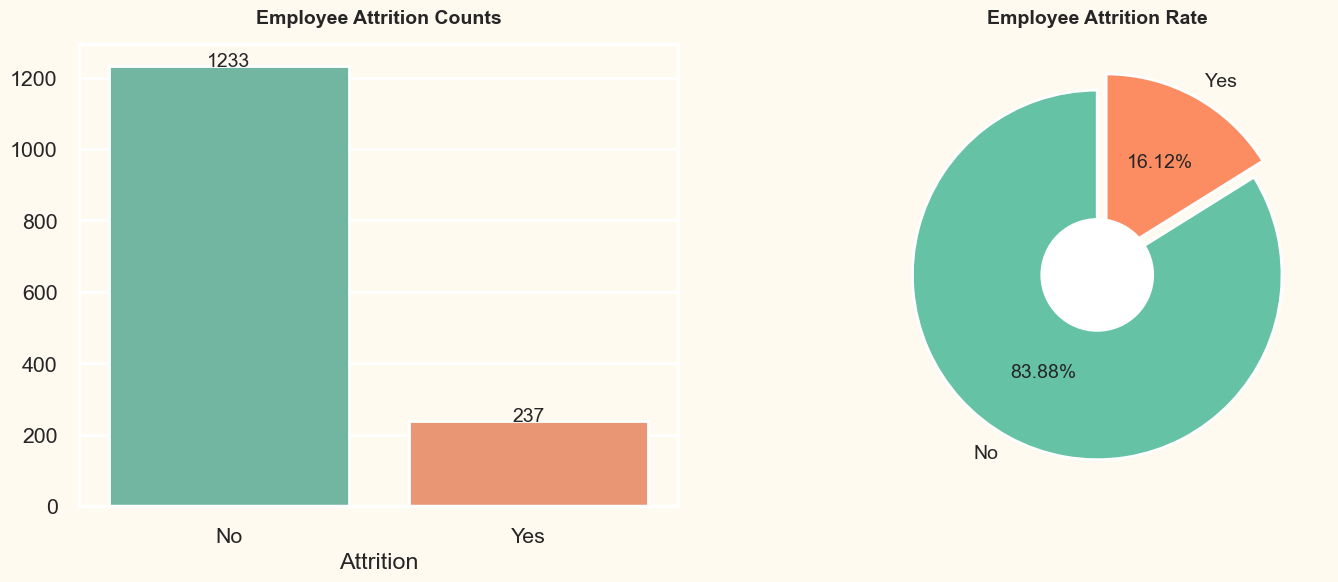

In [8]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

The Employee Attrition rate of this organization is 16.12%.
The data is unbalanced.
I think SMOTE is useful

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def pie_bar_plot(df, col, hue):
    """
    Plots a pie chart of the distribution of a specified column, a bar plot of the number of attritions, 
    and a bar plot of the attrition rate by the same column.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    col (str): The column name to plot the distribution for.
    hue (str): The column name used as hue for the plots (e.g., to distinguish different categories such as attrition).
    """
    plt.figure(figsize=(21, 6))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 3, 1)
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot of the number of attritions
    plt.subplot(1, 3, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index().reindex(value_counts.index).fillna(0)
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        attrition_percentage = "{:.1f}%".format(np.round((value / value_1.iloc[index]) * 100, 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    
    # Third subplot: Bar plot of the attrition rate
    plt.subplot(1, 3, 3)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_1.index, y=attrition_rate, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(attrition_rate):
        plt.text(index, value, f"{np.round(value, 1)}%", ha="center", va="bottom", size=10)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage
# df = pd.DataFrame(...)  # Create or load a DataFrame
# pie_bar_plot(df, 'JobLevel', 'Attrition')


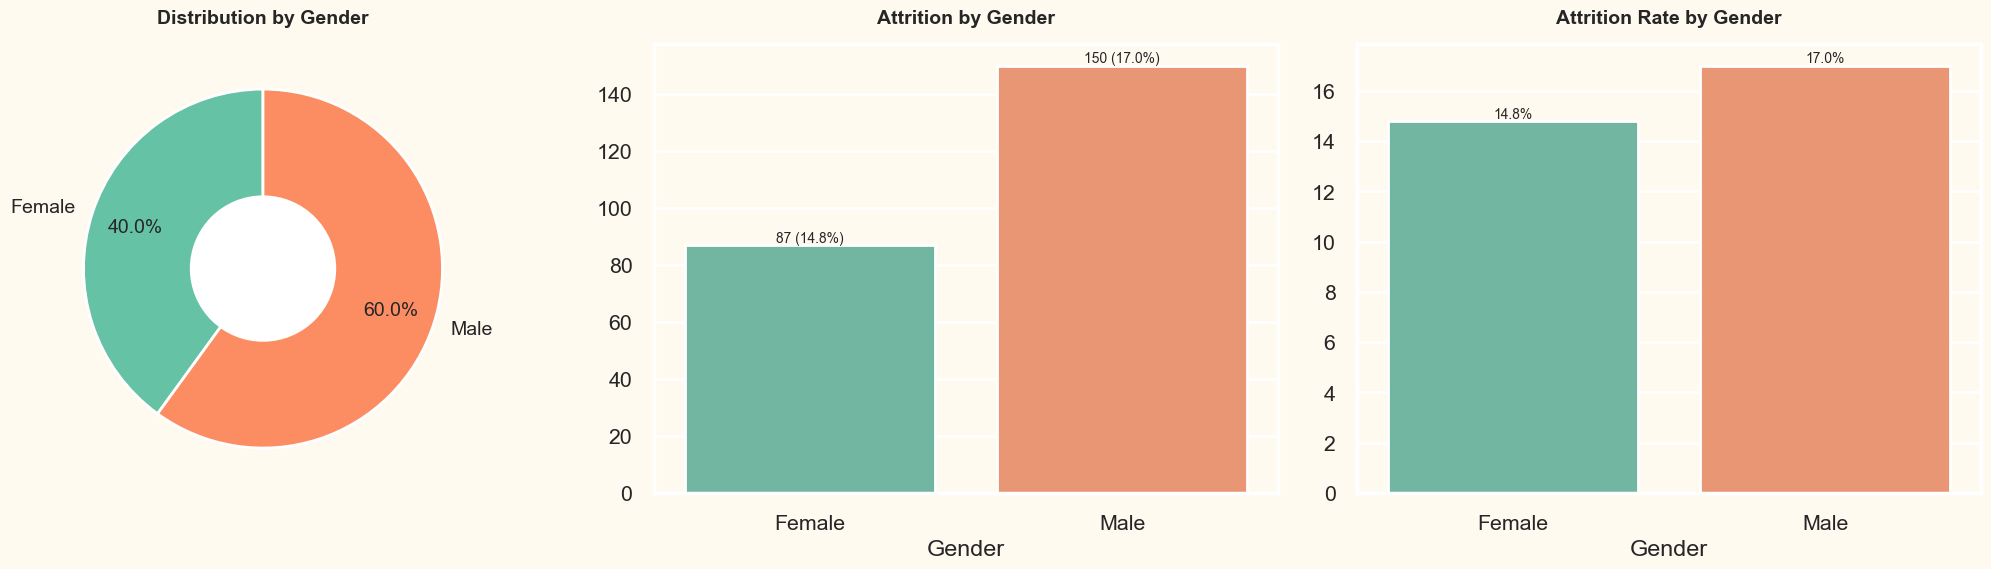

In [10]:
pie_bar_plot(df, 'Gender', 'Attrition')

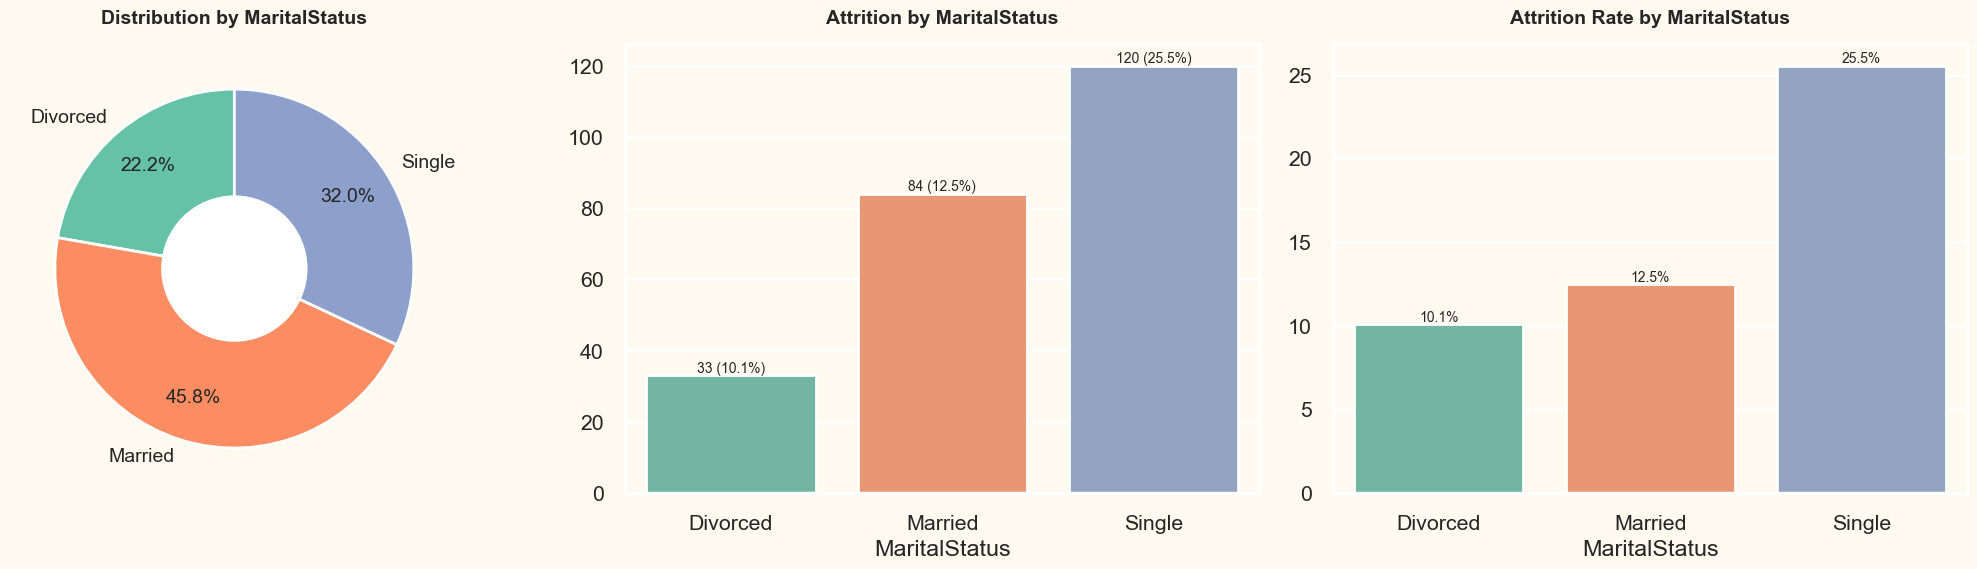

In [11]:
pie_bar_plot(df, 'MaritalStatus', 'Attrition')

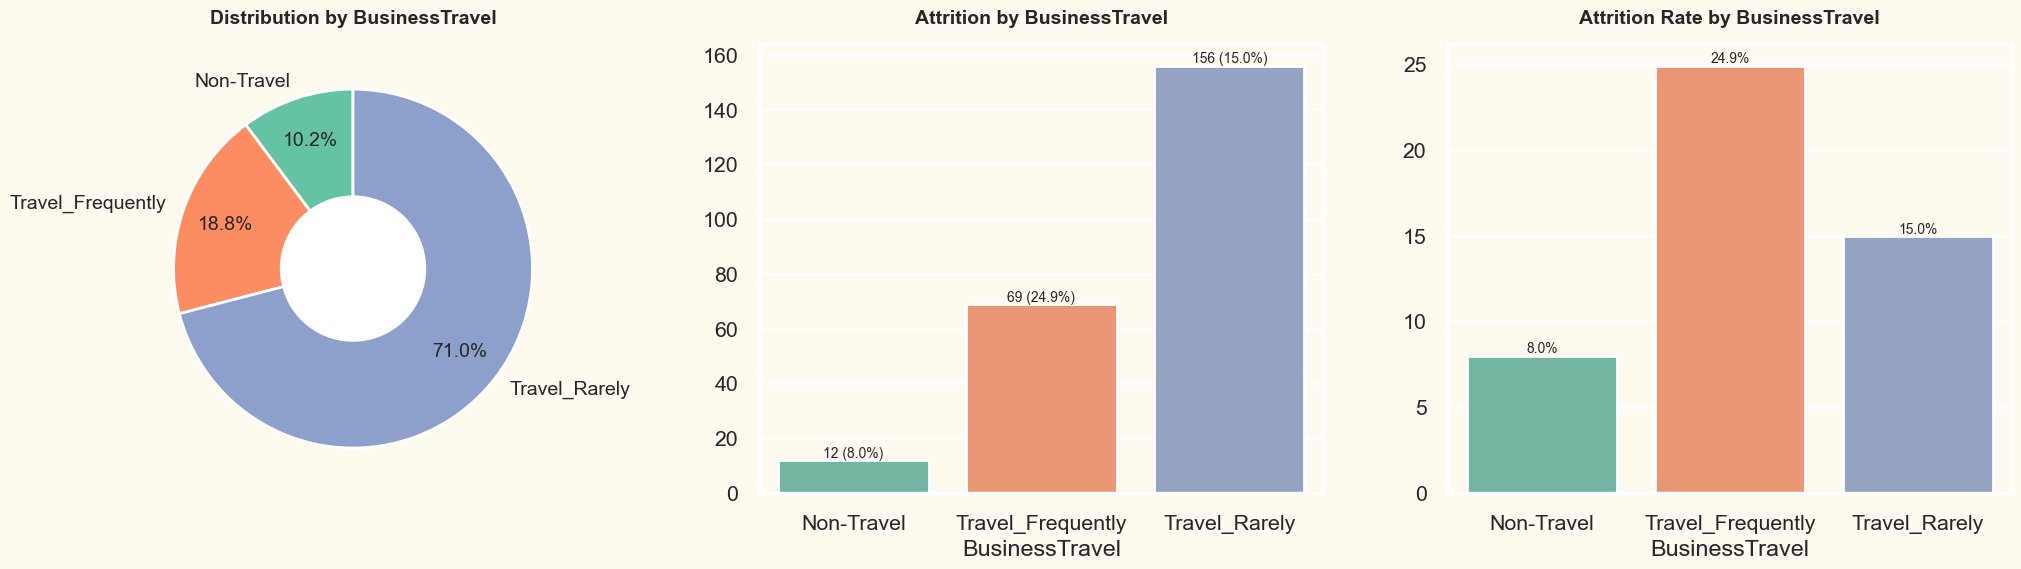

In [12]:
pie_bar_plot(df, 'BusinessTravel', 'Attrition')

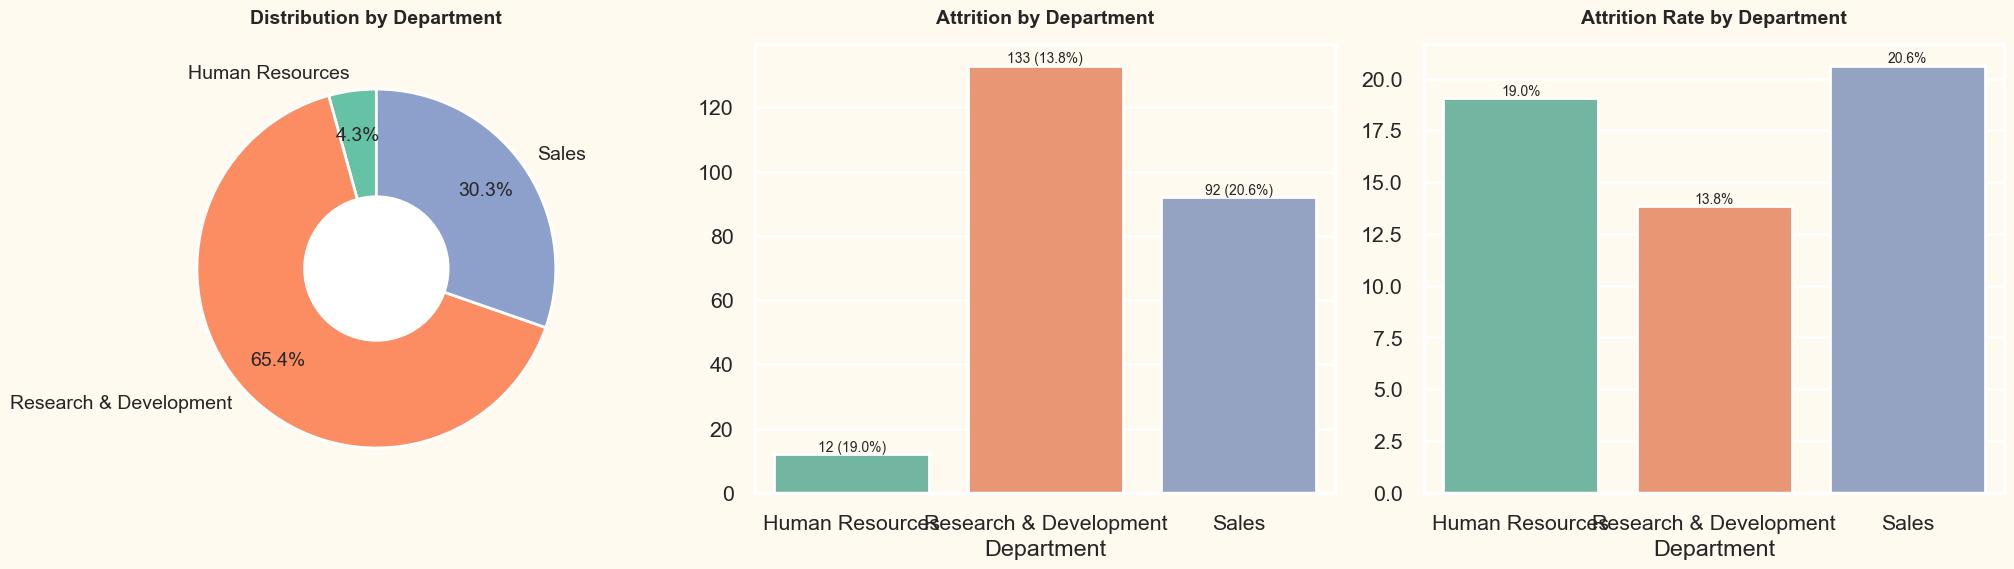

In [13]:
pie_bar_plot(df, 'Department', 'Attrition')

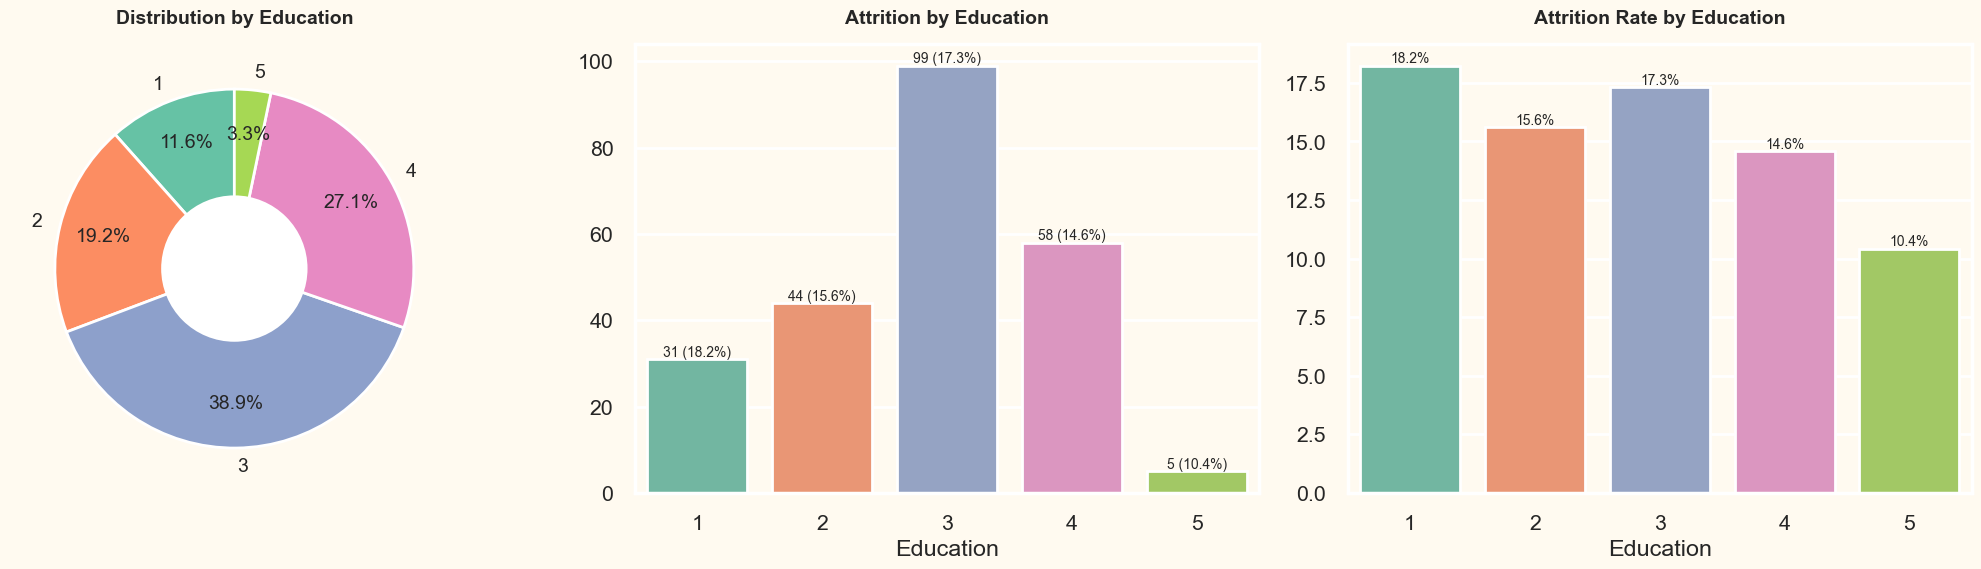

In [14]:
pie_bar_plot(df, 'Education', 'Attrition')

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import ticker

def hist_with_hue(df, col, hue):
    """
    Plots a histogram with KDE, a boxplot, and an attrition rate bar plot for a given column with respect to a hue.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    col (str): The column name to plot the distribution for.
    hue (str): The column name used as hue for the plots (e.g., to distinguish different categories).
    """
    plt.figure(figsize=(21, 6))
    
    # First subplot: Histogram with KDE
    plt.subplot(1, 3, 1)
    sns.histplot(x=col, hue=hue, data=df, kde=True, palette='Set2', element='step')
    
    # Setting the x-axis to show integer values and aligning labels to center
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels 90 degrees and align them to center
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)
    
    # Second subplot: Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=hue, y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    
    # Third subplot: Attrition rate bar plot
    plt.subplot(1, 3, 3)
    df['binned'] = pd.cut(df[col], bins=10)  # Bin the column into 10 intervals
    binned_counts = df['binned'].value_counts().sort_index()  # Count values in each bin
    attrition_counts = df[df[hue] == 'Yes']['binned'].value_counts().sort_index().reindex(binned_counts.index).fillna(0)
    attrition_rate = (attrition_counts / binned_counts * 100).values  # Calculate attrition rate
    sns.barplot(x=binned_counts.index, y=attrition_rate, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=10)
    
    # Adding labels to the bars
    for index, value in enumerate(attrition_rate):
        plt.text(index, value, f"{np.round(value, 1)}%", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

# Example usage
# df = pd.DataFrame(...)  # Create or load a DataFrame
# hist_with_hue(df, 'MonthlyRate', 'Attrition')



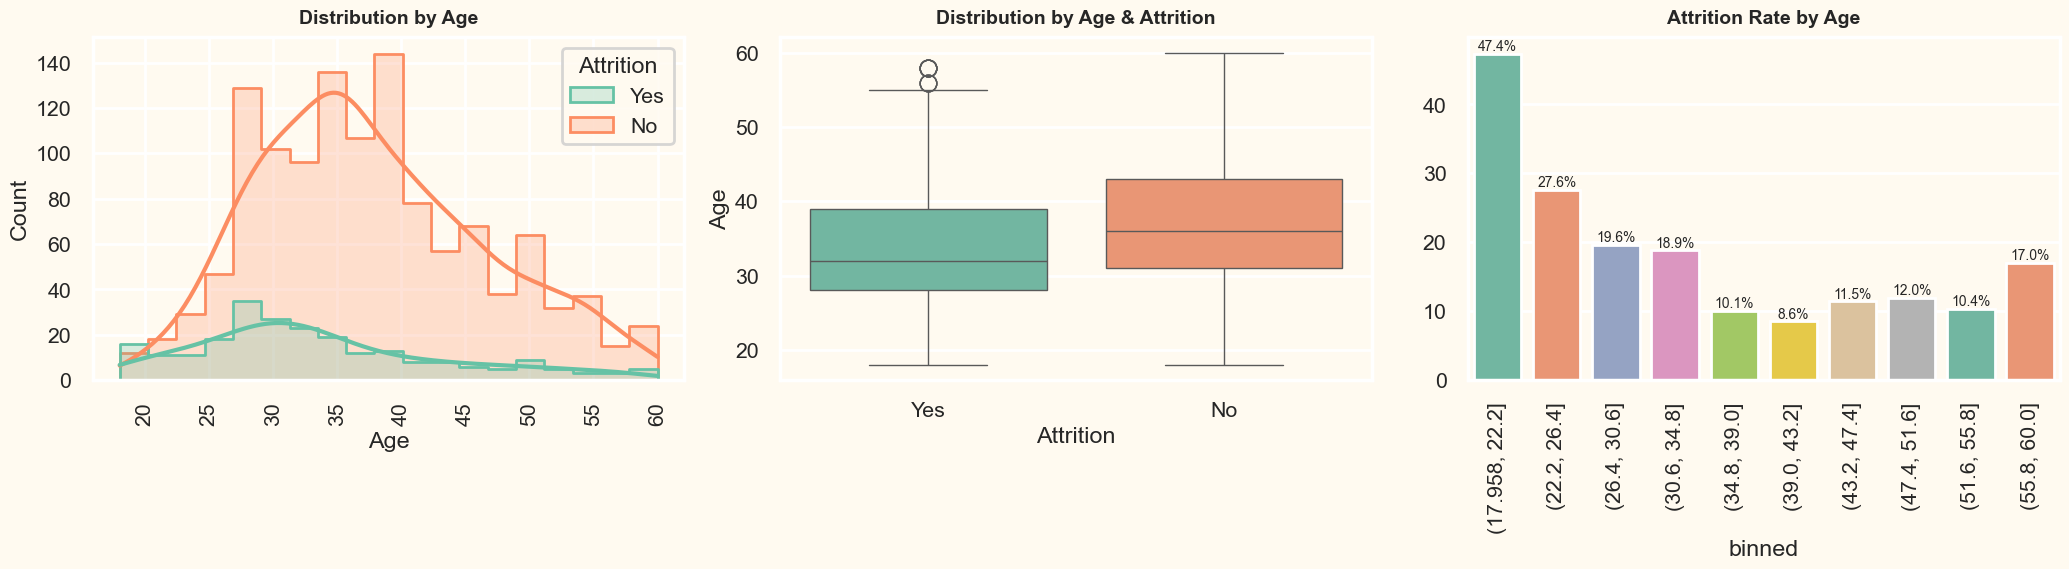

In [16]:
hist_with_hue(df, 'Age', 'Attrition')

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def count_percent_plot(df, col, hue):
    """
    Plots the distribution of employees by a specified column, the number of attritions, 
    and the attrition rate by the same column.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    col (str): The column name to plot the distribution for.
    hue (str): The column name used as hue for the plots (e.g., to distinguish different categories such as attrition).
    """
    plt.figure(figsize=(20, 8))
    
    # First subplot: Overall distribution of the specified column
    plt.subplot(1, 3, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Second subplot: Number of attritions by the specified column
    value_2 = df[df[hue] == 'Yes'][col].value_counts().reindex(value_1.index).fillna(0)
    plt.subplot(1, 3, 2)
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round((value / value_1.iloc[index]) * 100, 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Third subplot: Attrition rate by the specified column
    plt.subplot(1, 3, 3)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_1.index, y=attrition_rate, order=value_1.index, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(attrition_rate):
        plt.text(index, value, f"{np.round(value, 1)}%", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show plot
    plt.show()

# Example usage
# df = pd.DataFrame(...)  # Create or load a DataFrame
# count_percent_plot(df, 'JobLevel', 'Attrition')


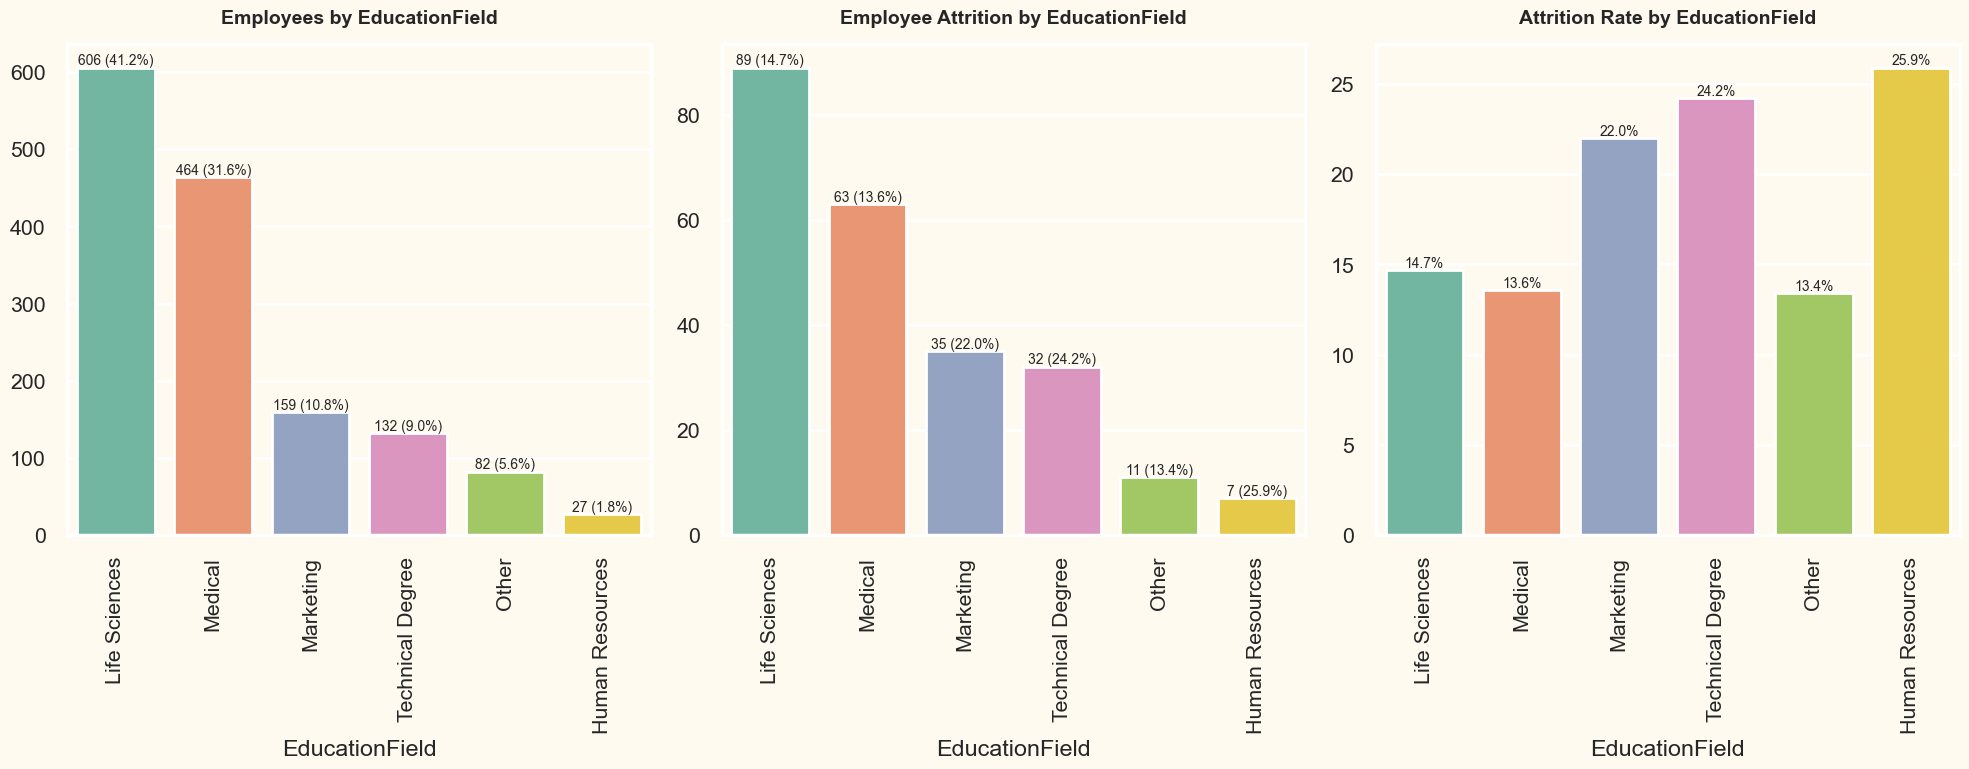

In [18]:
count_percent_plot(df, 'EducationField', 'Attrition')

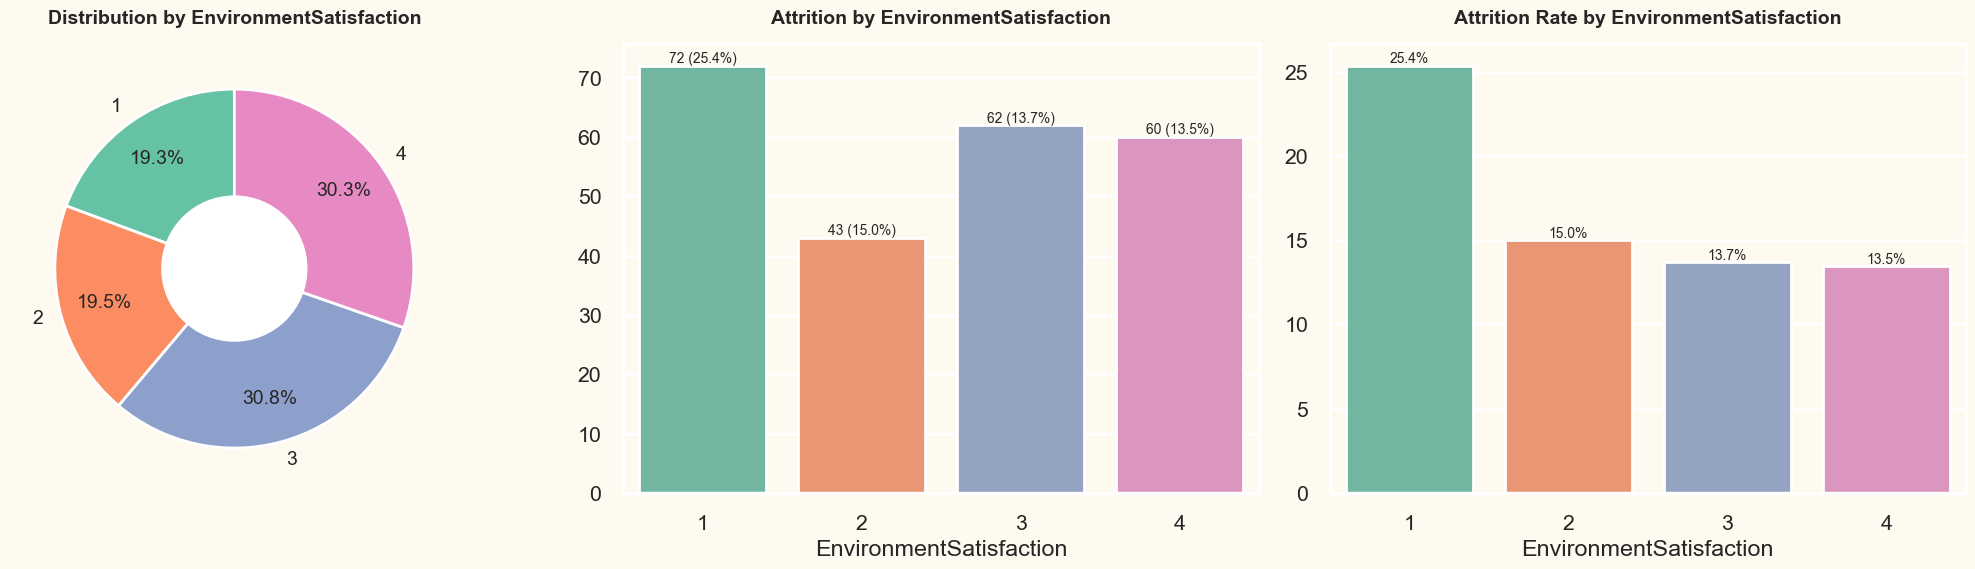

In [19]:
pie_bar_plot(df, 'EnvironmentSatisfaction', 'Attrition')

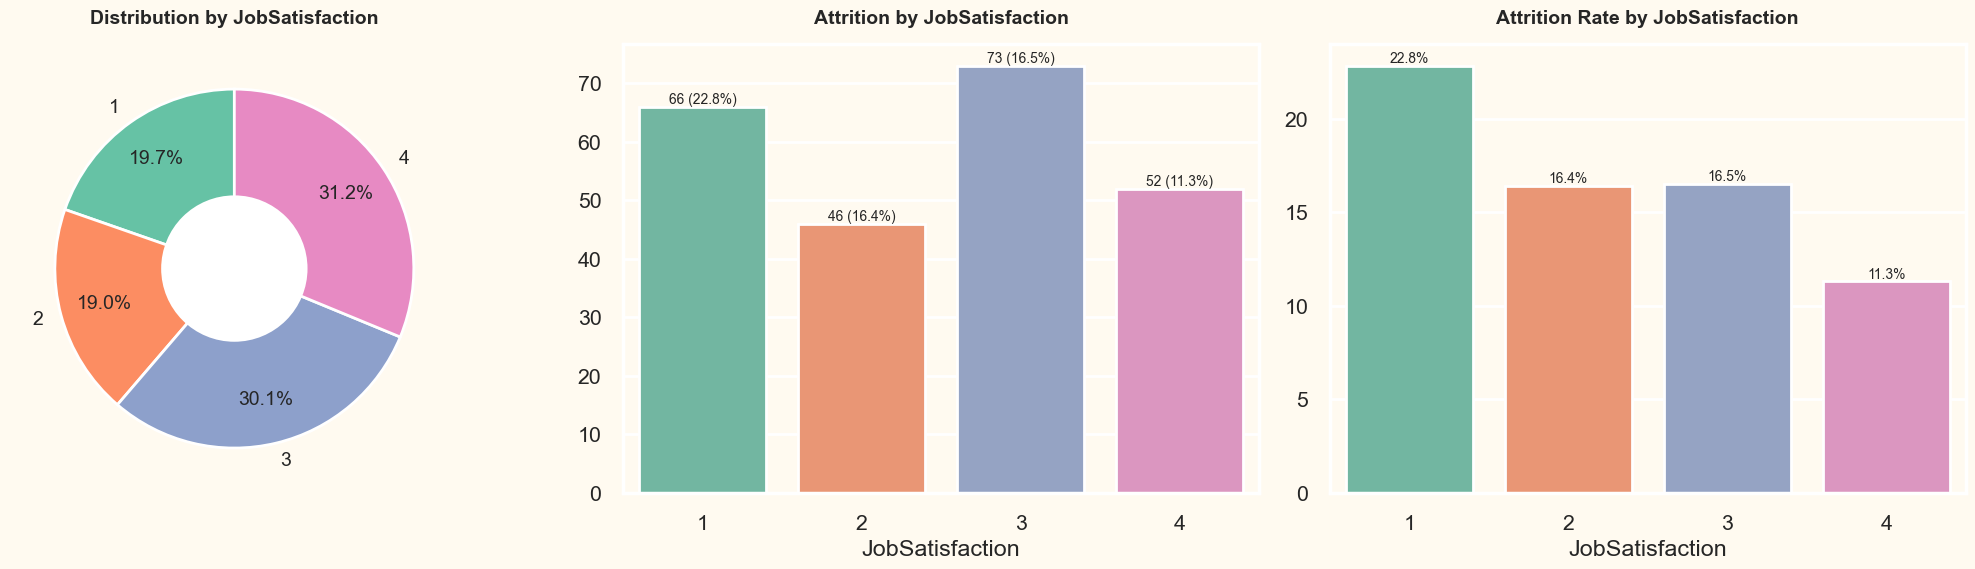

In [20]:
pie_bar_plot(df, 'JobSatisfaction', 'Attrition')

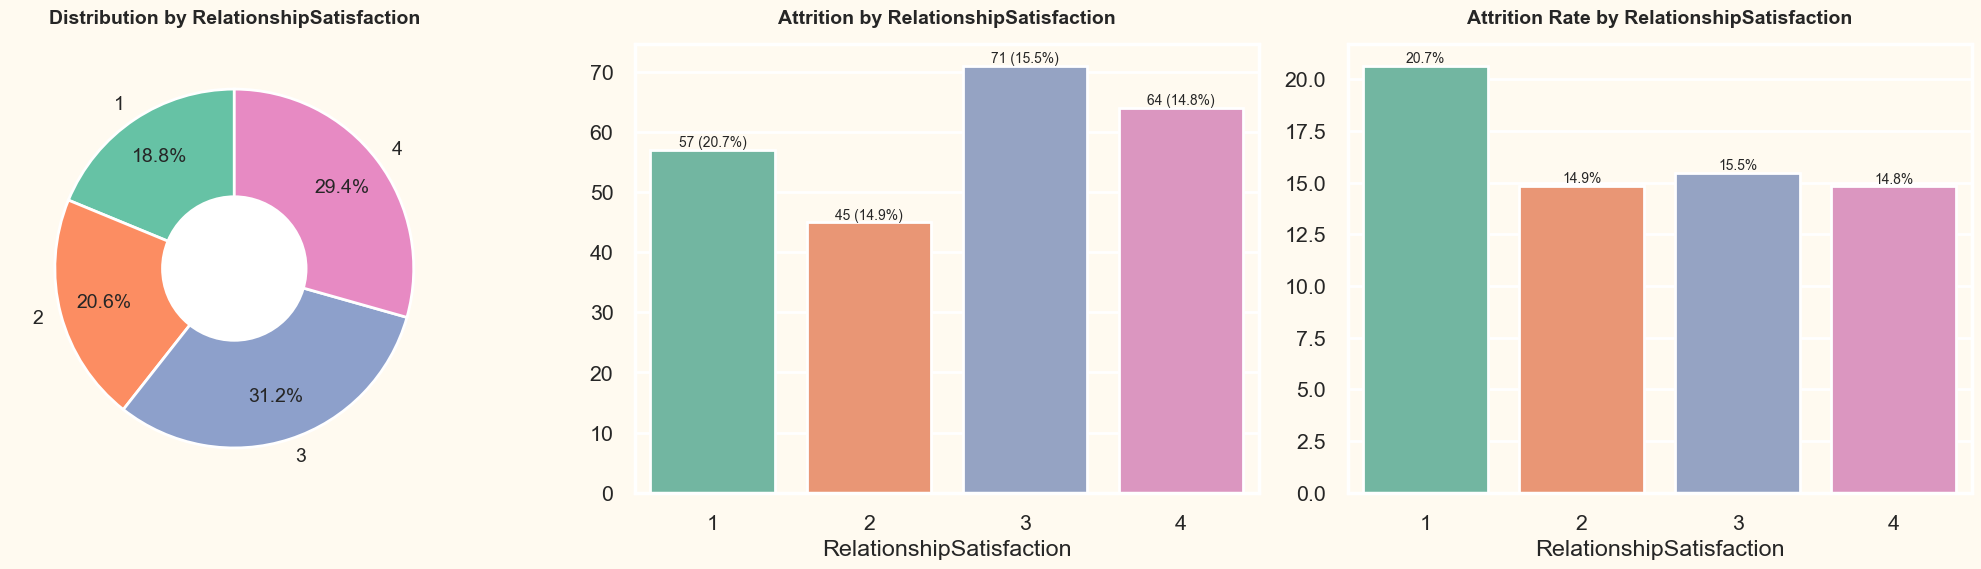

In [21]:
pie_bar_plot(df, 'RelationshipSatisfaction', 'Attrition')

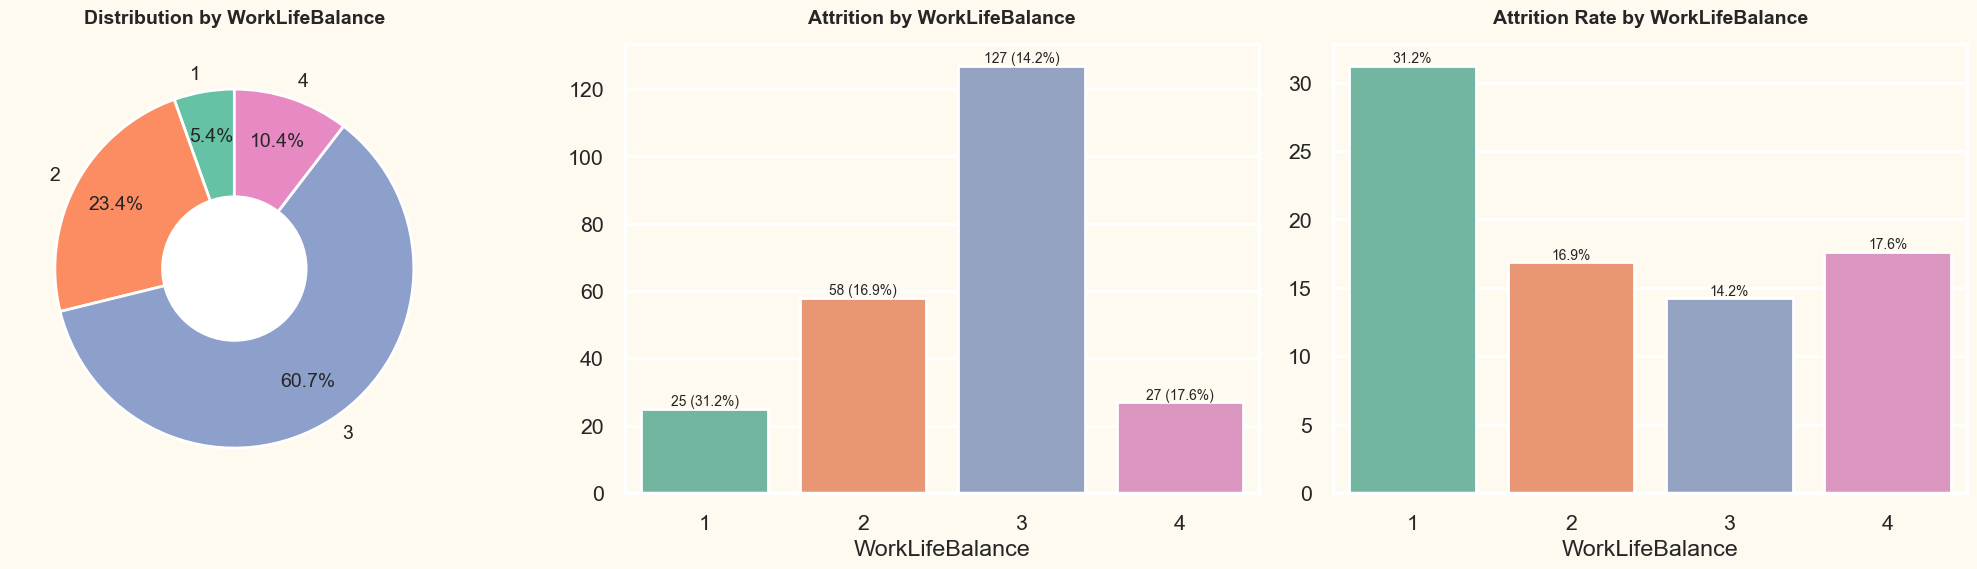

In [22]:
pie_bar_plot(df, 'WorkLifeBalance', 'Attrition')

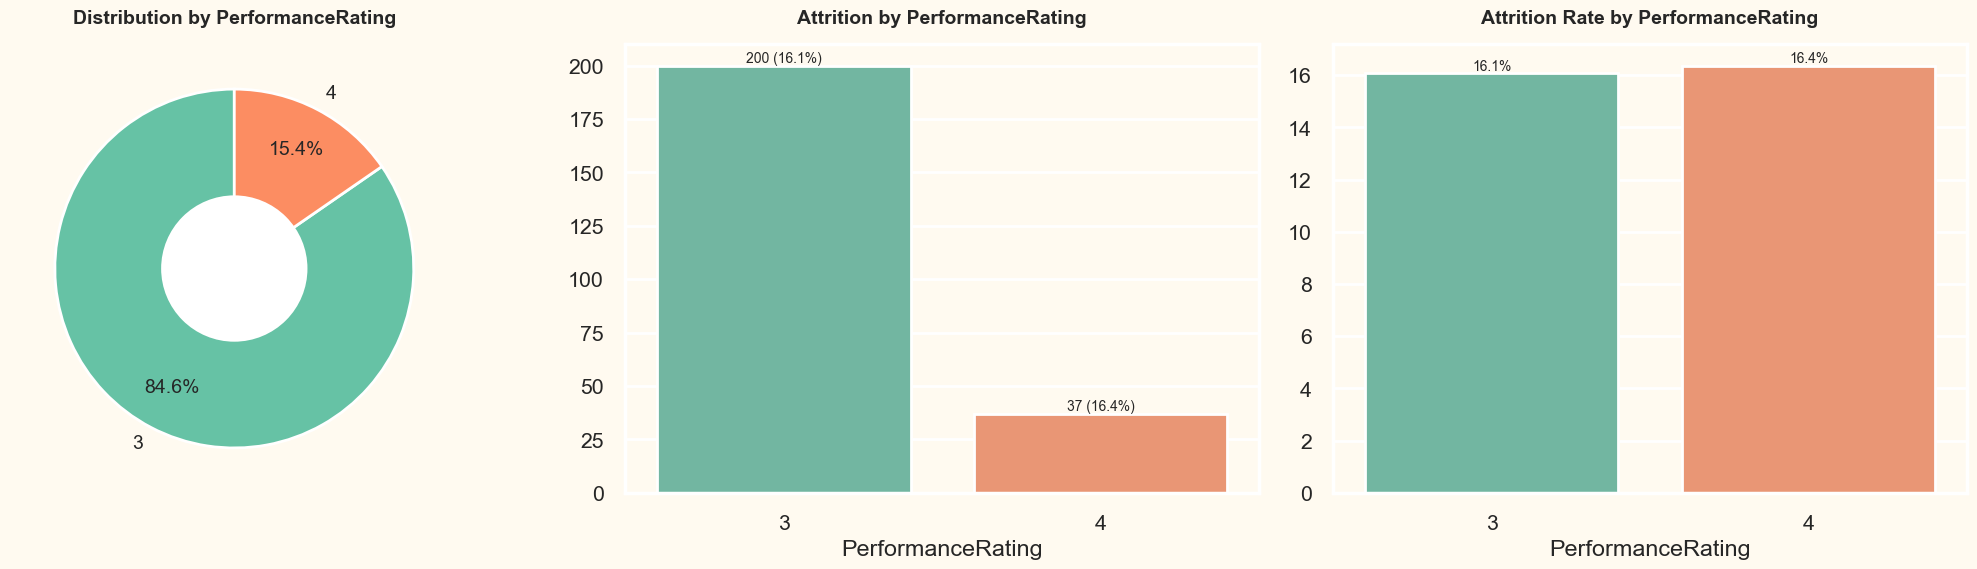

In [23]:
pie_bar_plot(df, 'PerformanceRating', 'Attrition')

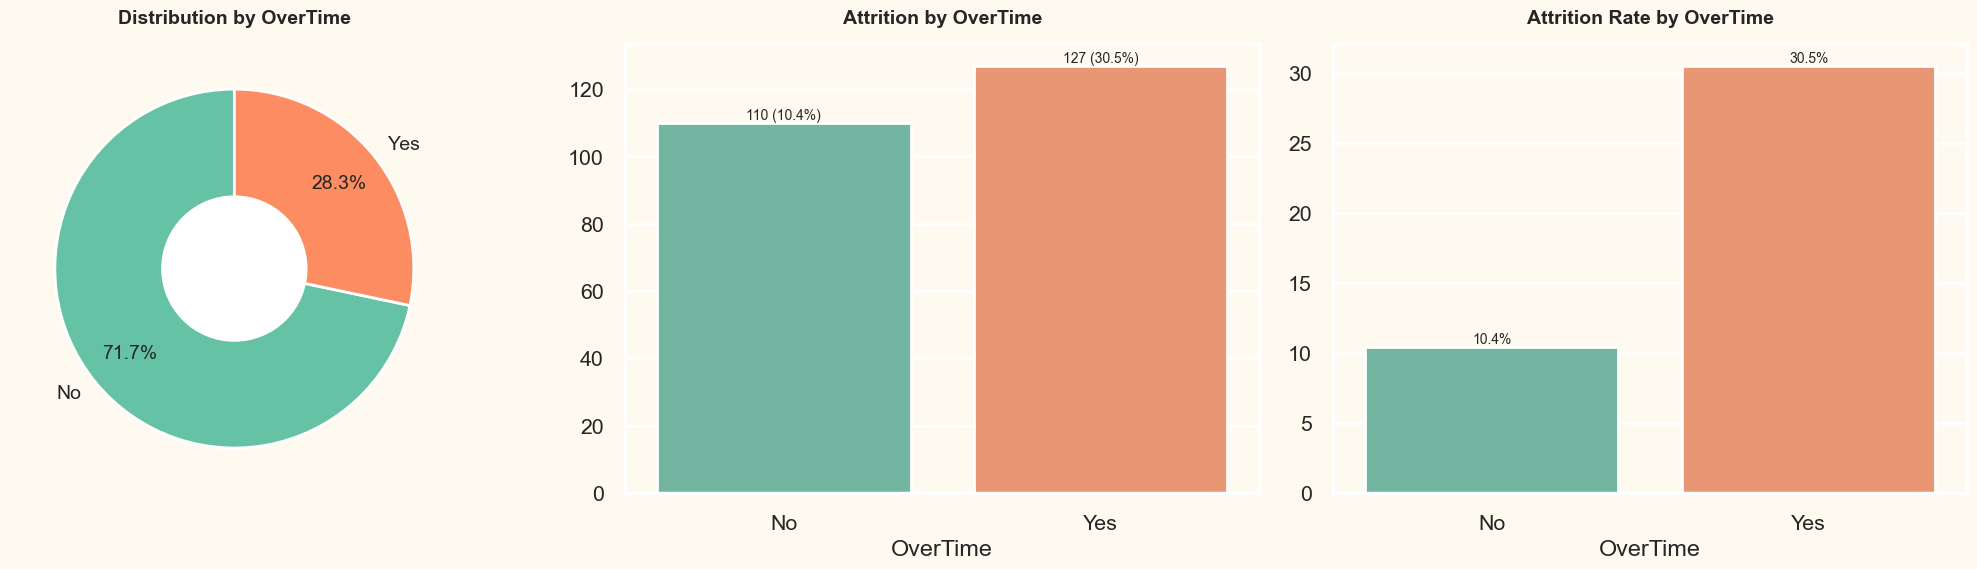

In [24]:
pie_bar_plot(df, 'OverTime', 'Attrition')

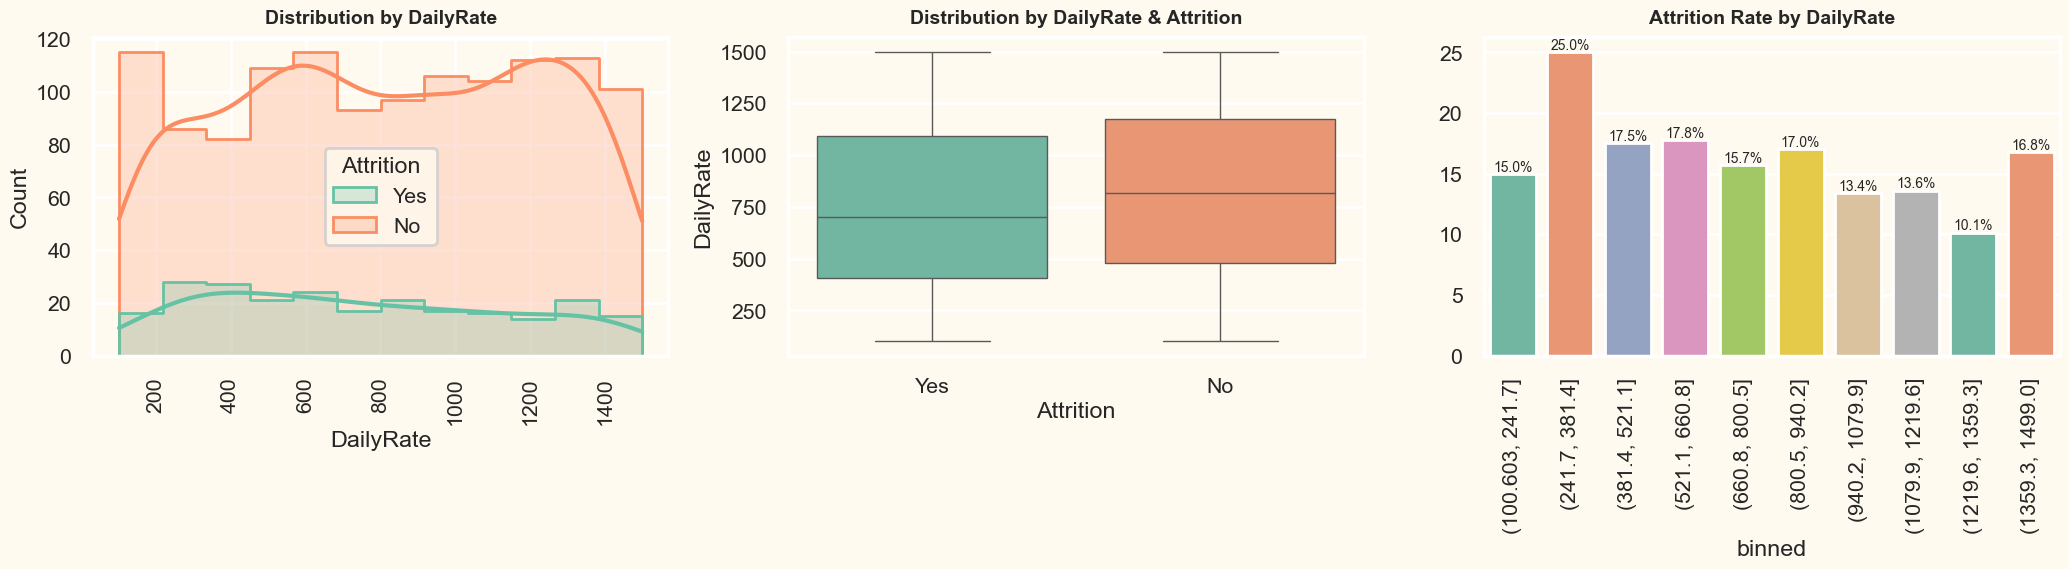

In [25]:
hist_with_hue(df, 'DailyRate', 'Attrition')

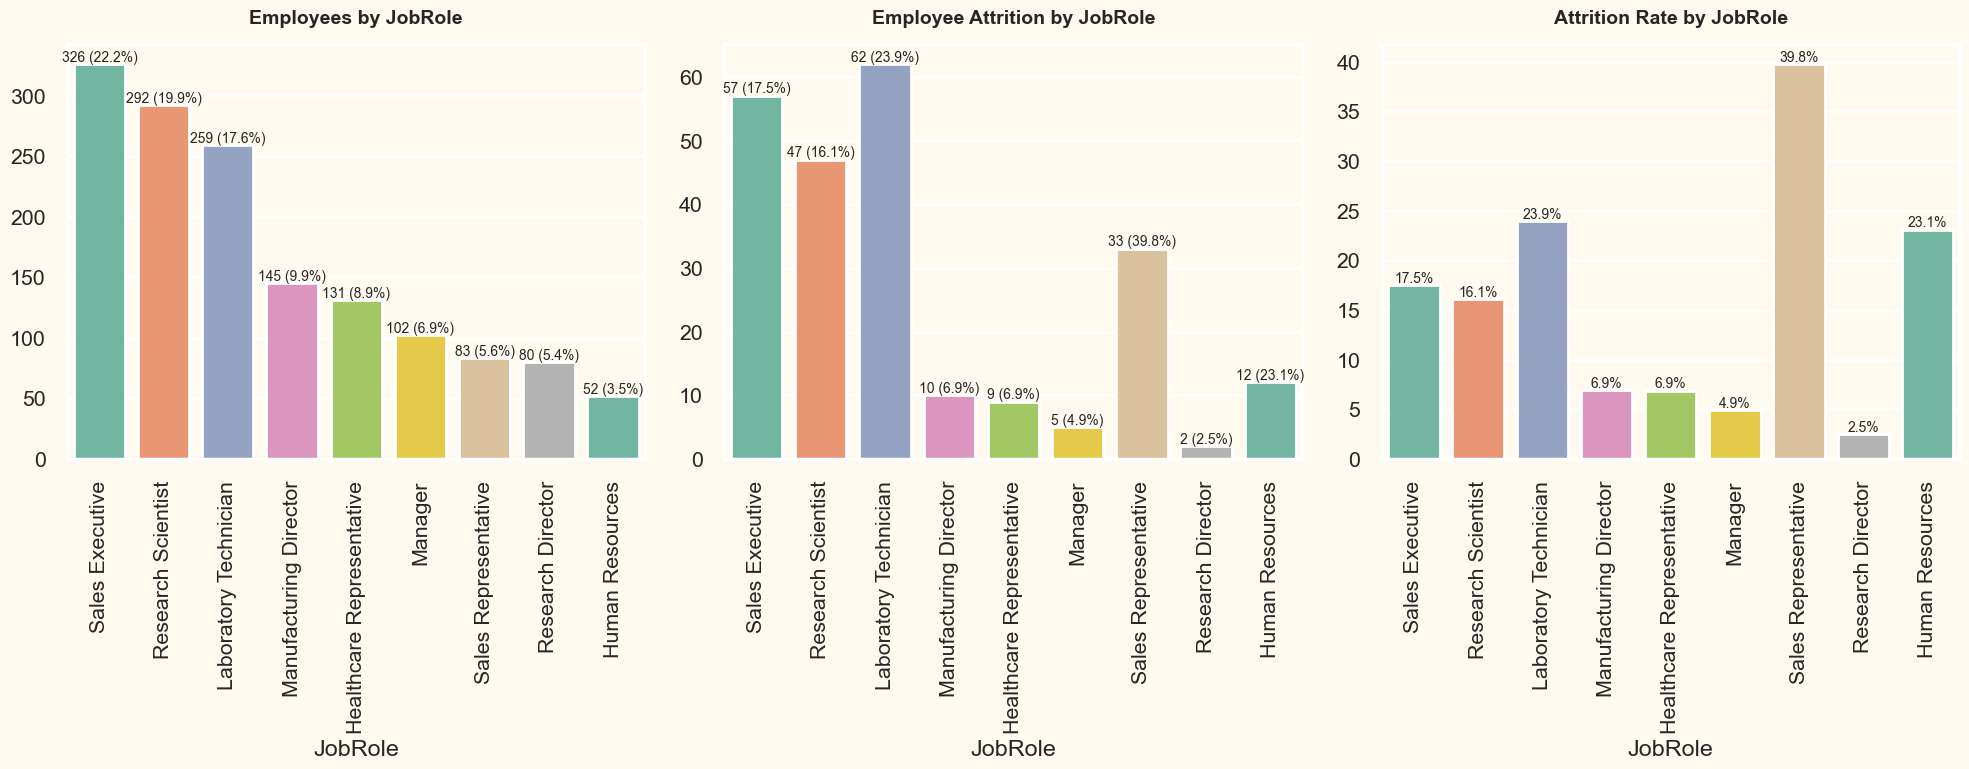

In [26]:
count_percent_plot(df, 'JobRole', 'Attrition')

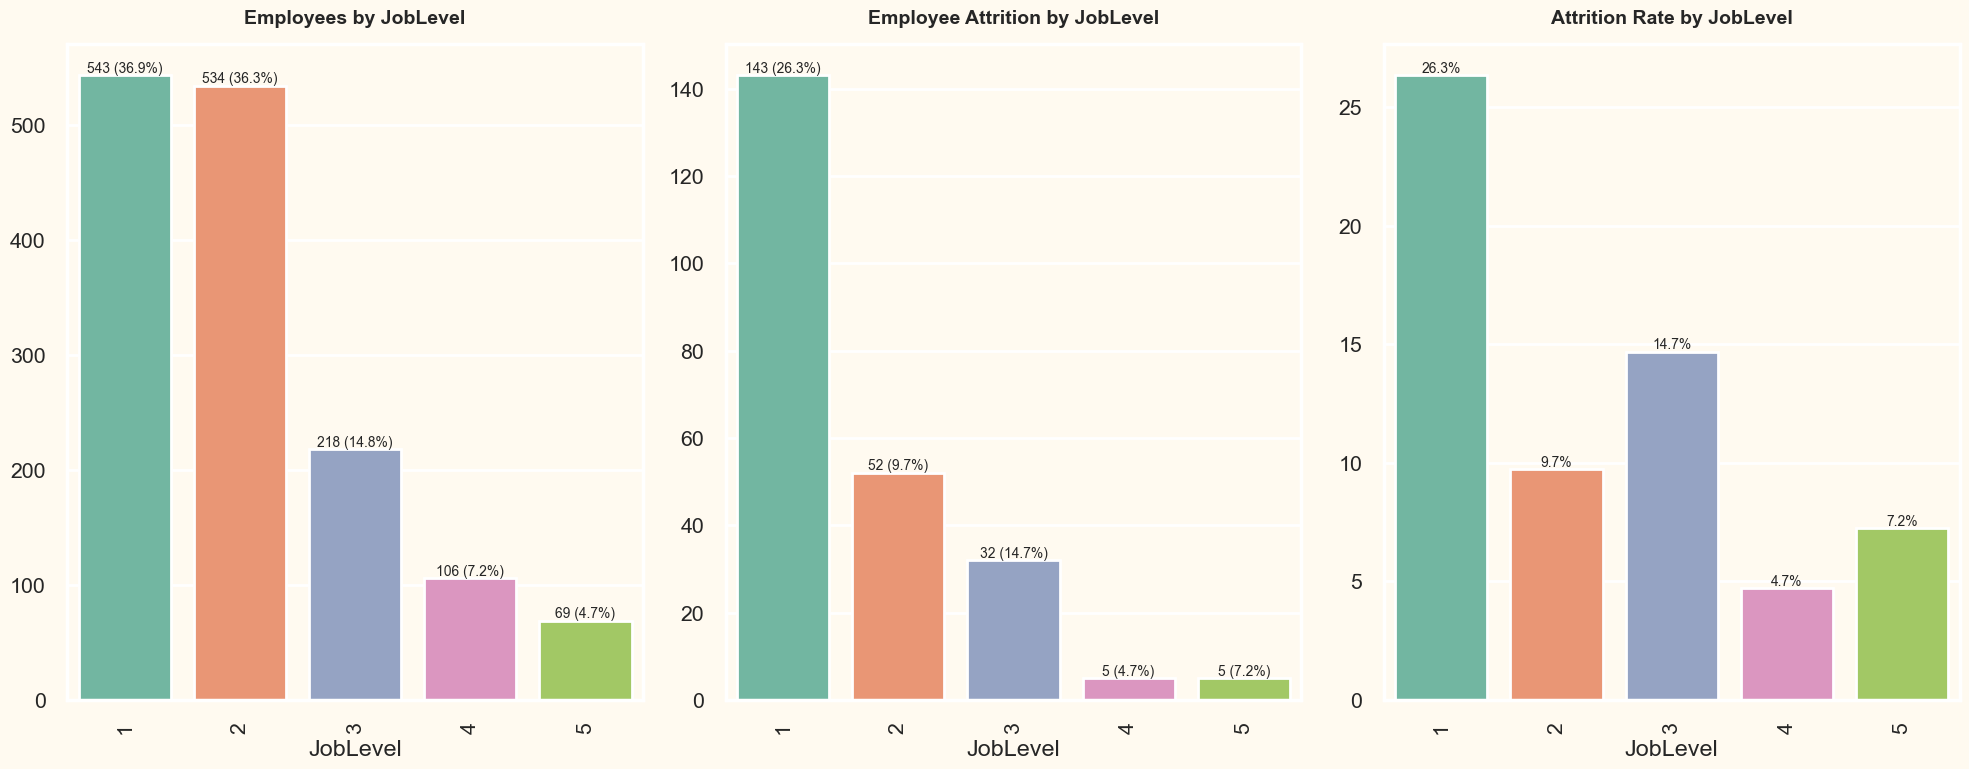

In [27]:
count_percent_plot(df, 'JobLevel', 'Attrition')

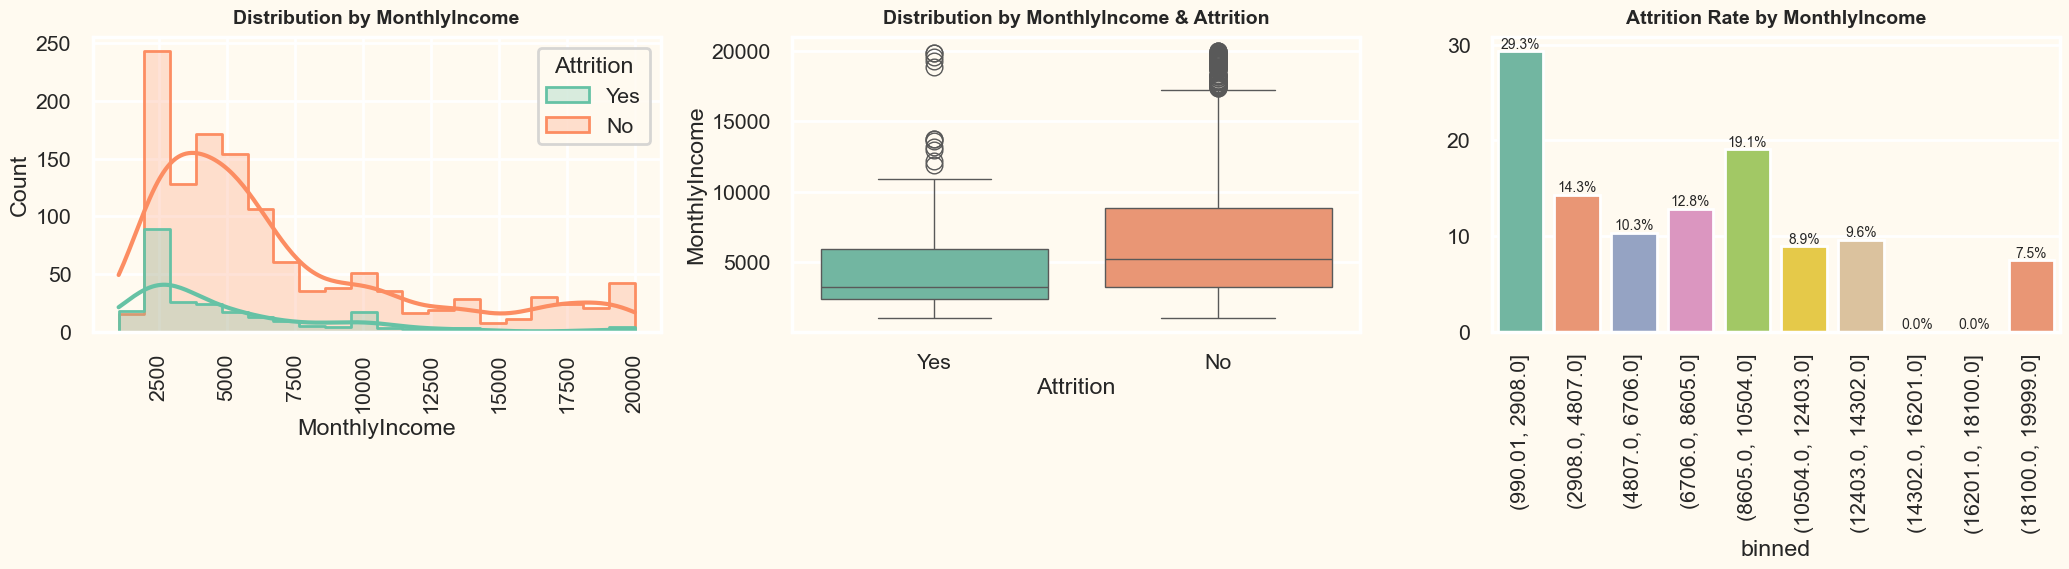

In [28]:
hist_with_hue(df, 'MonthlyIncome', 'Attrition')

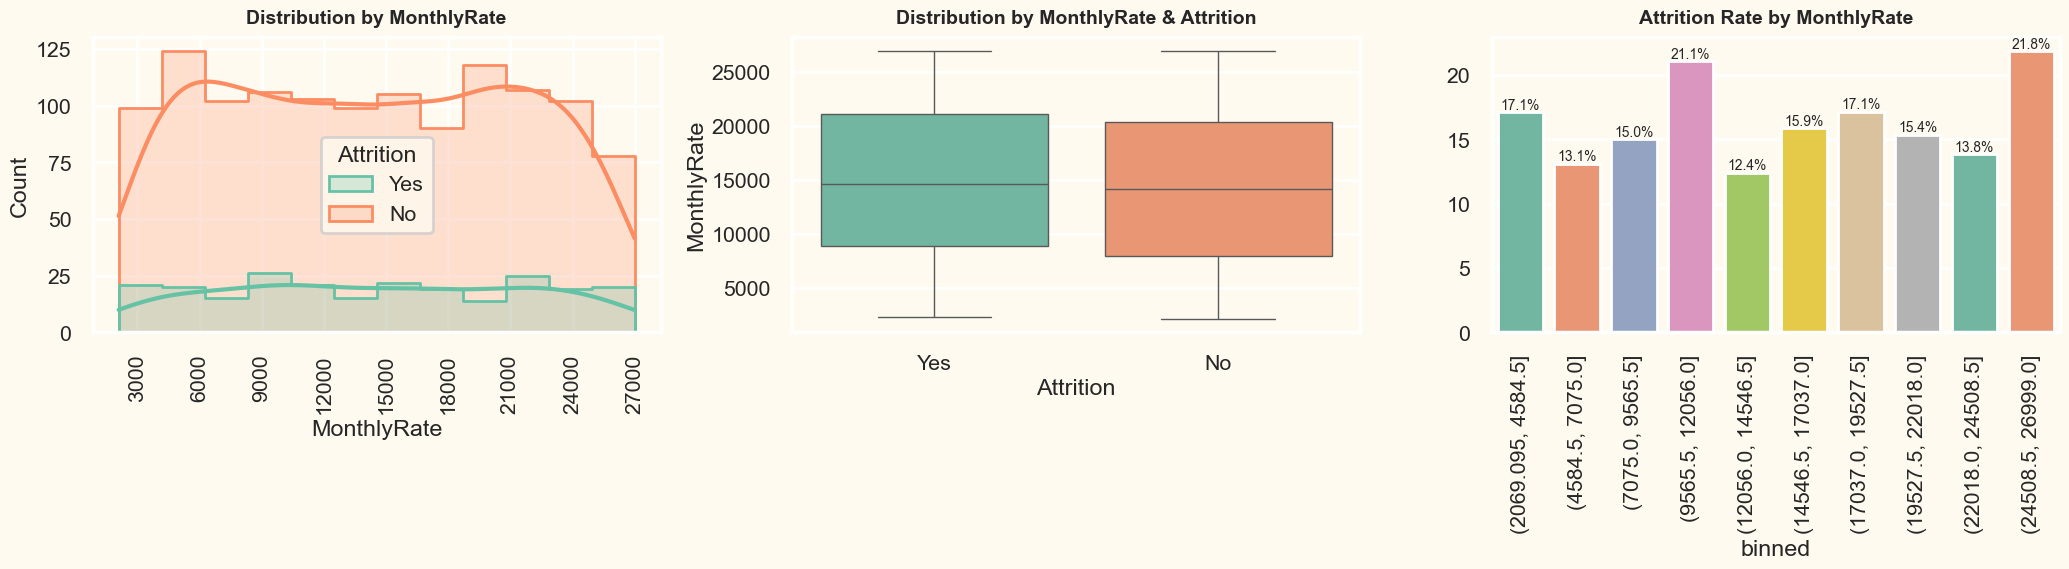

In [29]:
hist_with_hue(df, 'MonthlyRate', 'Attrition')

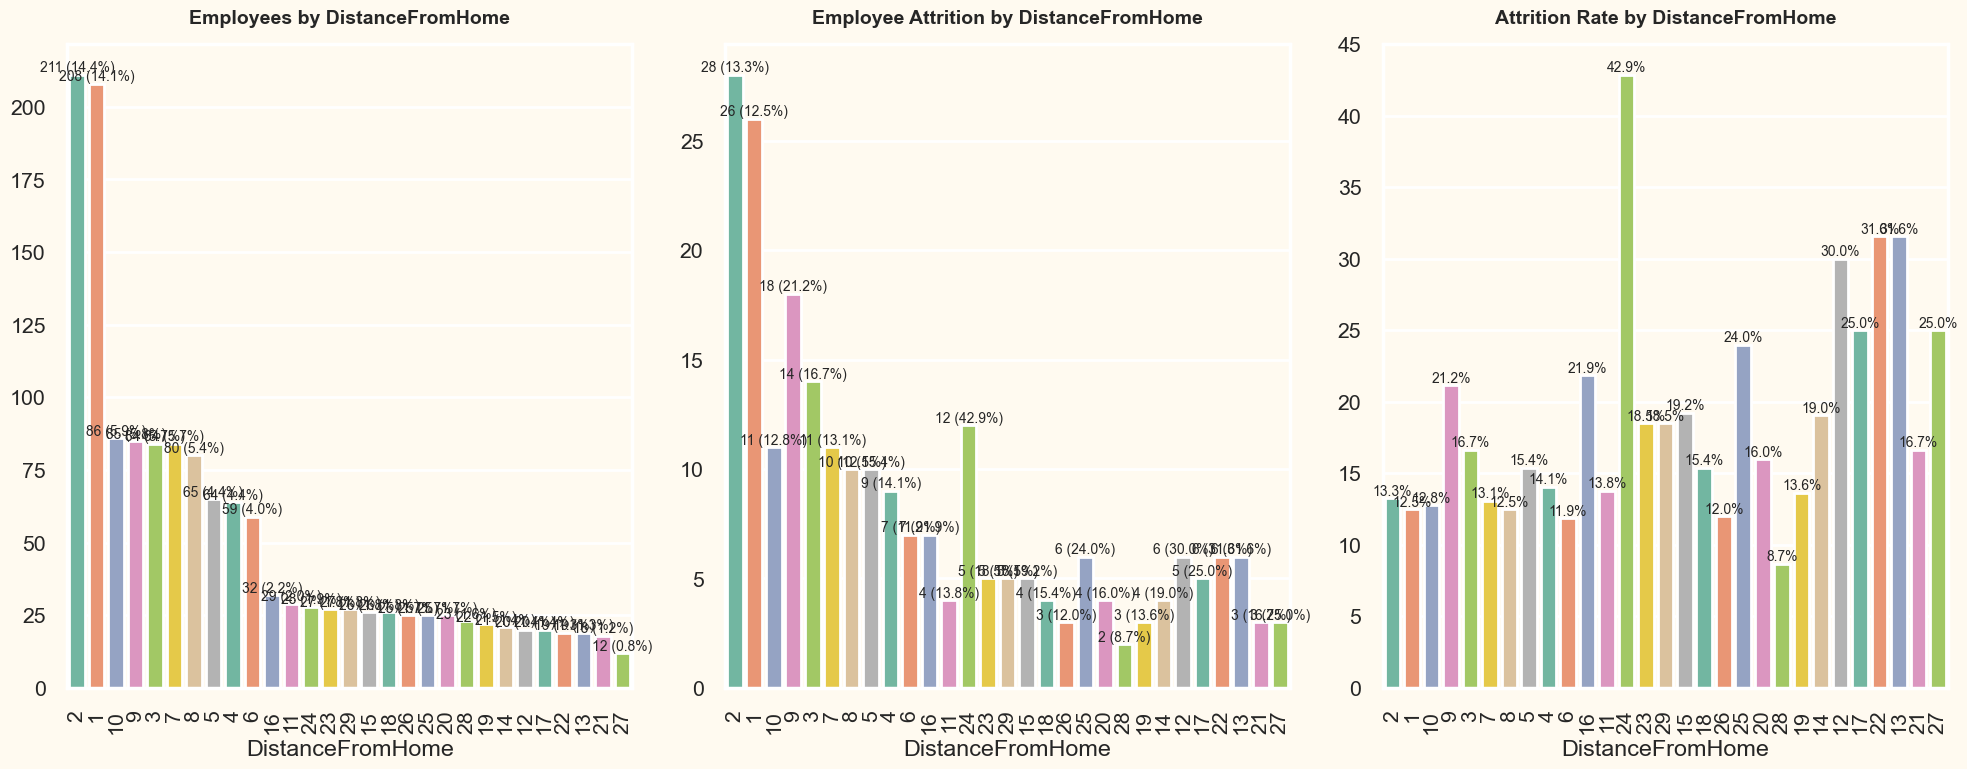

In [30]:
count_percent_plot(df, 'DistanceFromHome', 'Attrition')

진짜 개못생겻네 binning 진행시켜!

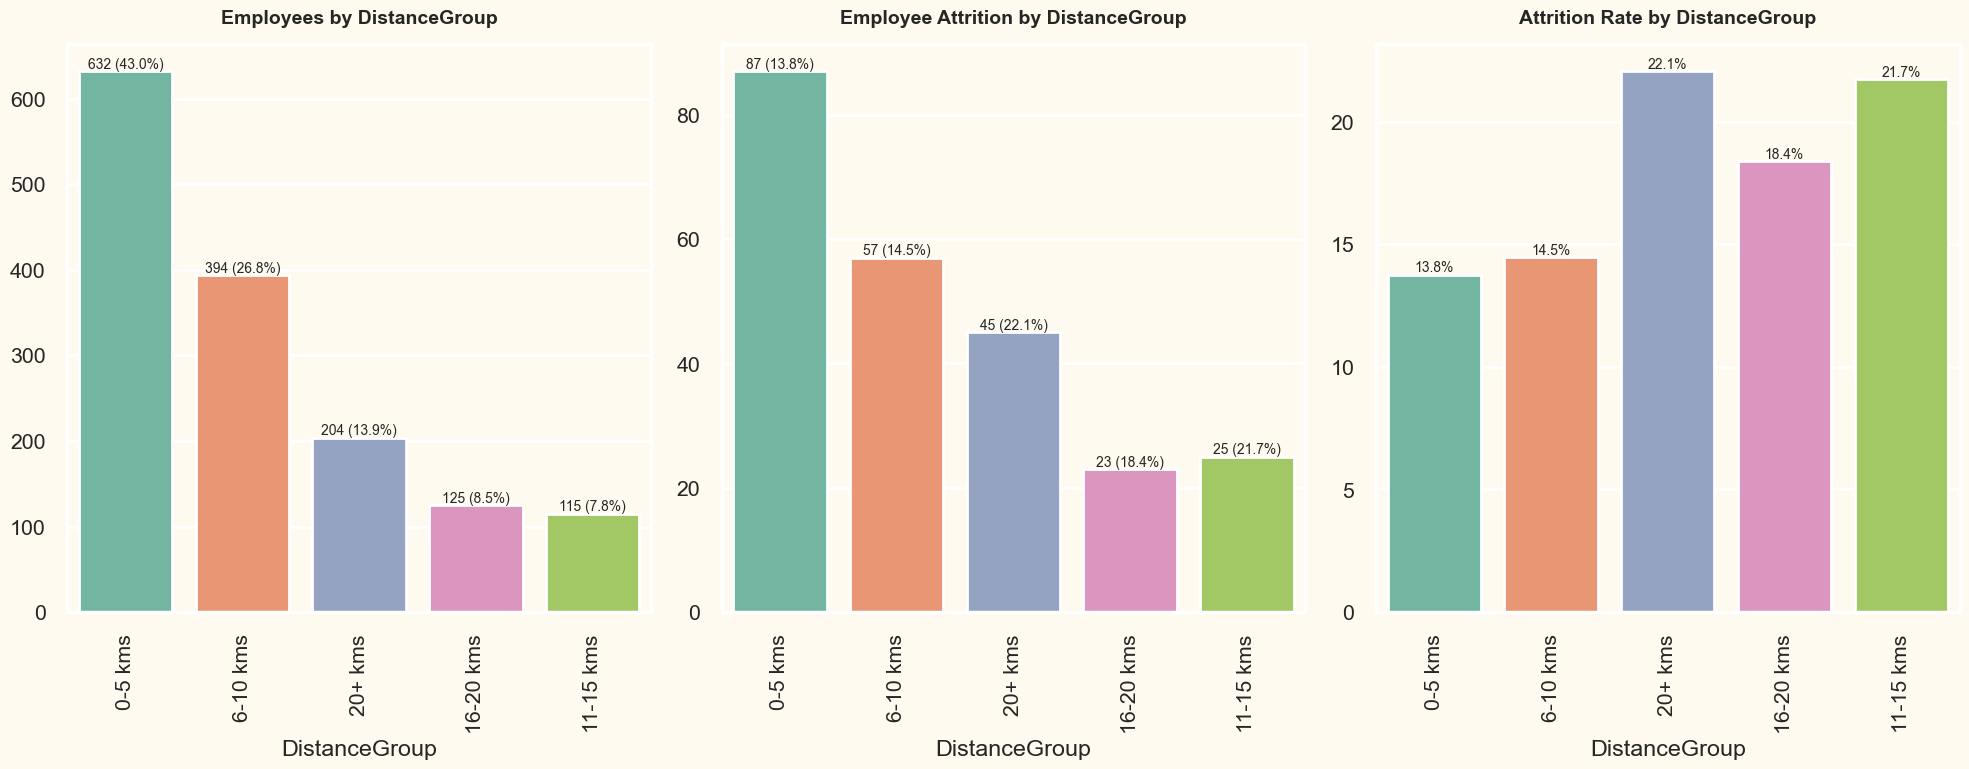

In [31]:
# Define the bin edges for the groups
bin_edges = [0,5,10,15,20,30]

# Define the labels for the groups
bin_labels = ['0-5 kms', '6-10 kms', '11-15 kms','16-20 kms', '20+ kms']

# Cuttinf the DistaanceFromHome column into groups
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=bin_edges, labels=bin_labels)
count_percent_plot(df, 'DistanceGroup', 'Attrition')

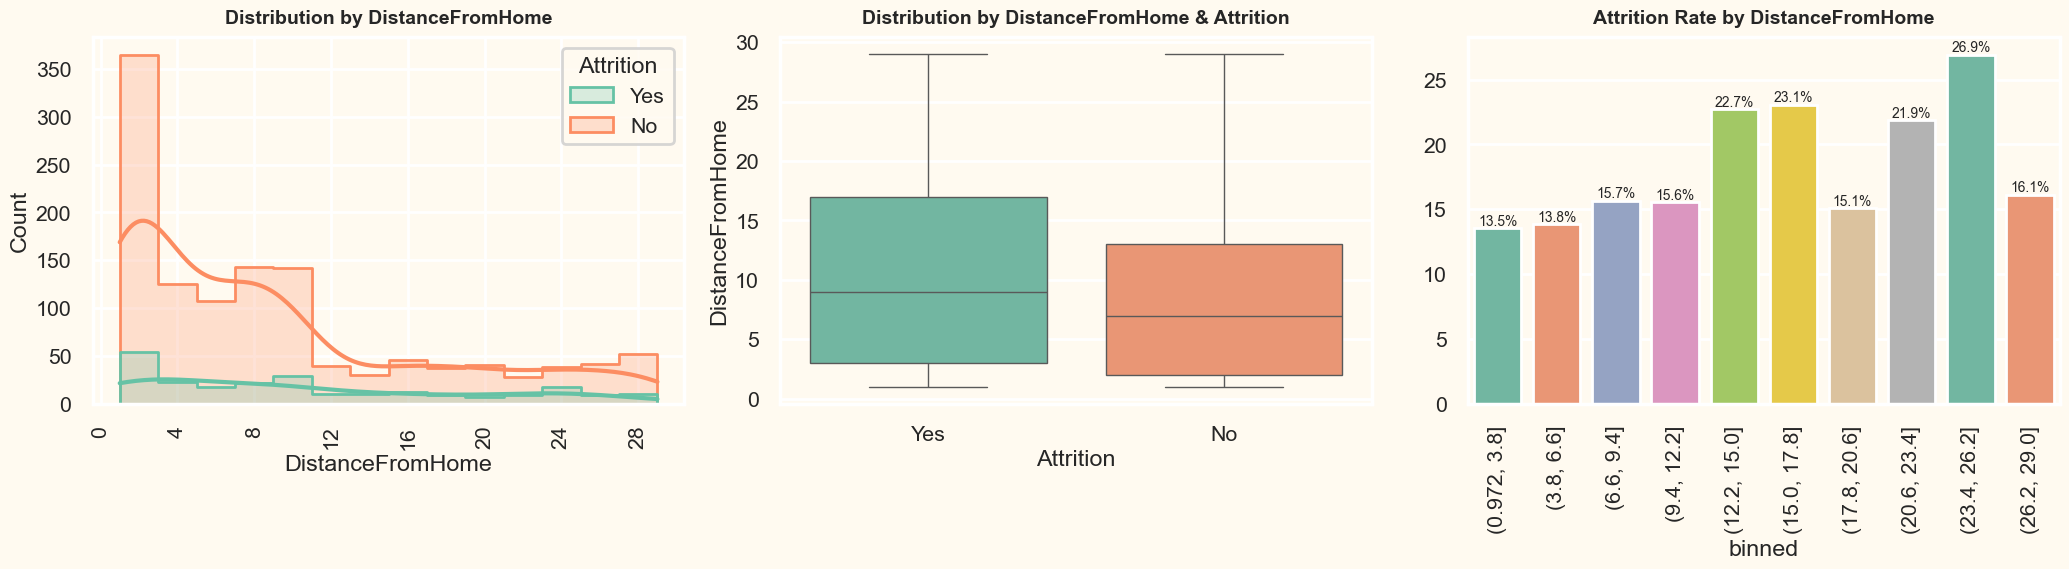

In [32]:
hist_with_hue(df, 'DistanceFromHome', 'Attrition')

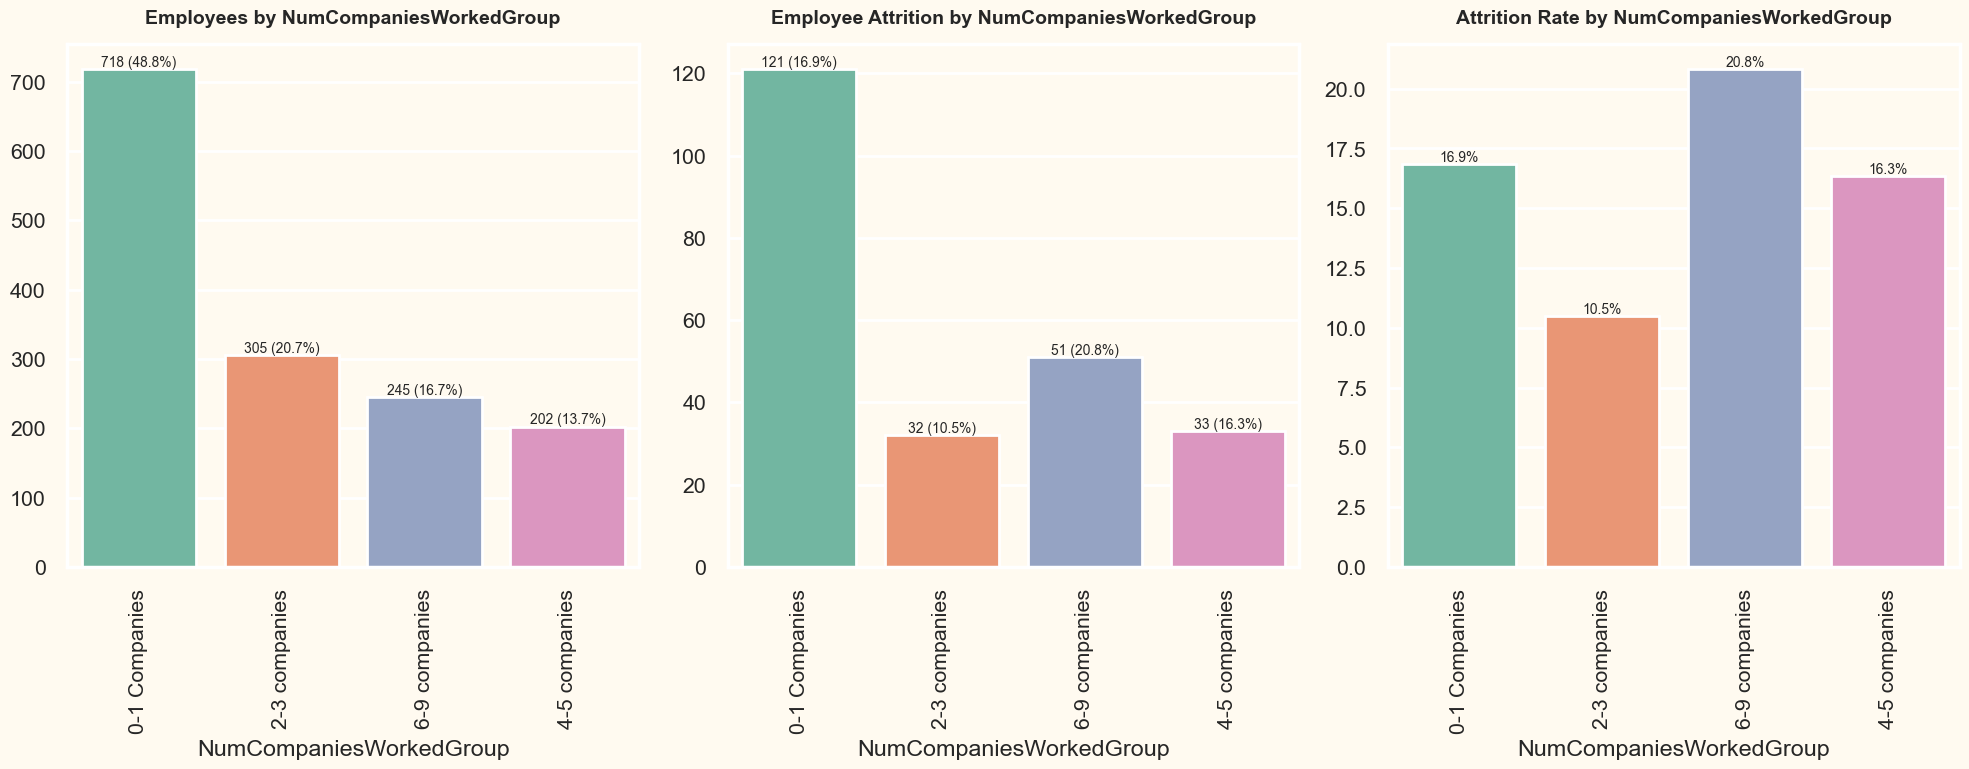

In [33]:
# Define the bin edges for the groups
bin_edges = [-1, 1, 3, 5, 10]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "6-9 companies"]

# Cut the DailyRate column into groups
df["NumCompaniesWorkedGroup"] = pd.cut(df['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)
count_percent_plot(df, 'NumCompaniesWorkedGroup', 'Attrition')

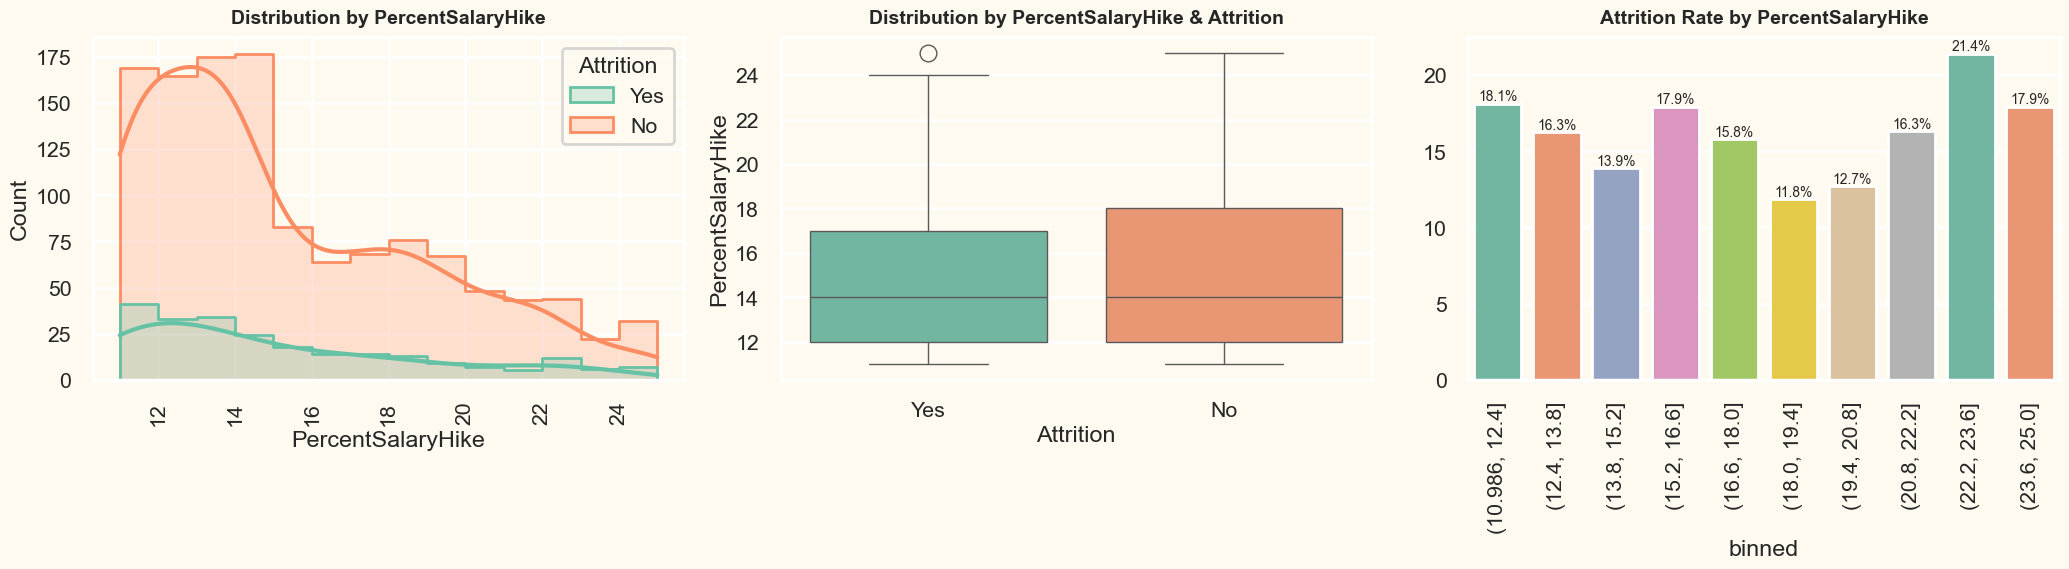

In [34]:
hist_with_hue(df, 'PercentSalaryHike', 'Attrition')

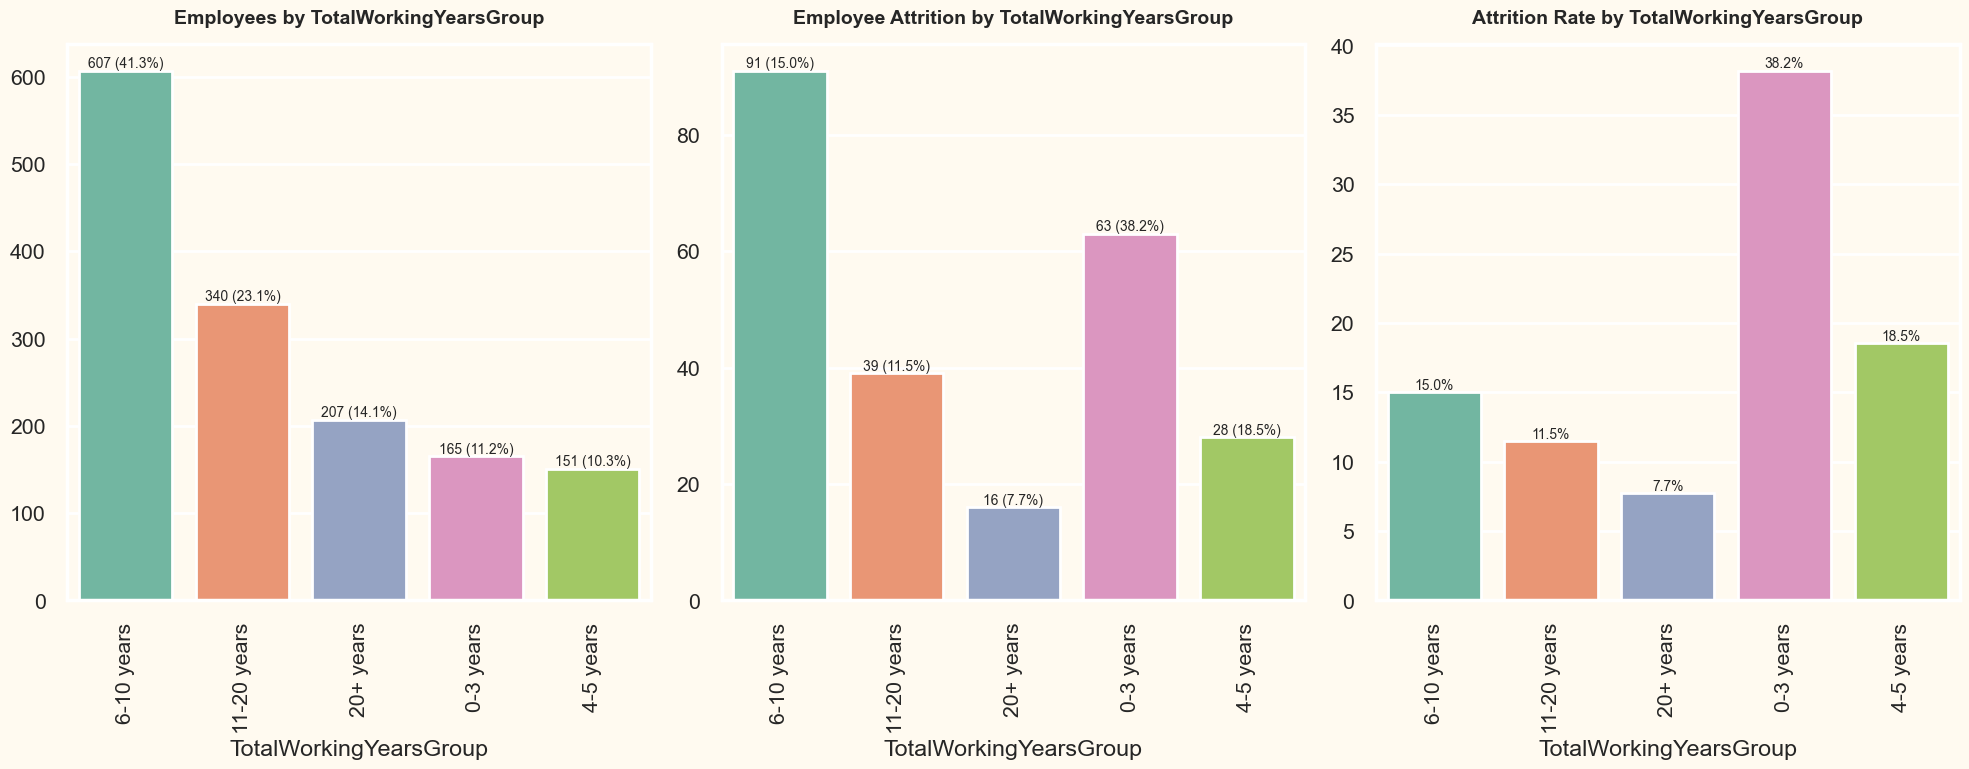

In [35]:
# Define the bin edges for the groups
bin_edges = [-1, 3, 5, 10, 20, 50]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-3 years', '4-5 years', '6-10 years', '11-20 years', "20+ years"]

# Cut the DailyRate column into groups
df["TotalWorkingYearsGroup"] = pd.cut(df['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)
count_percent_plot(df, 'TotalWorkingYearsGroup', 'Attrition')

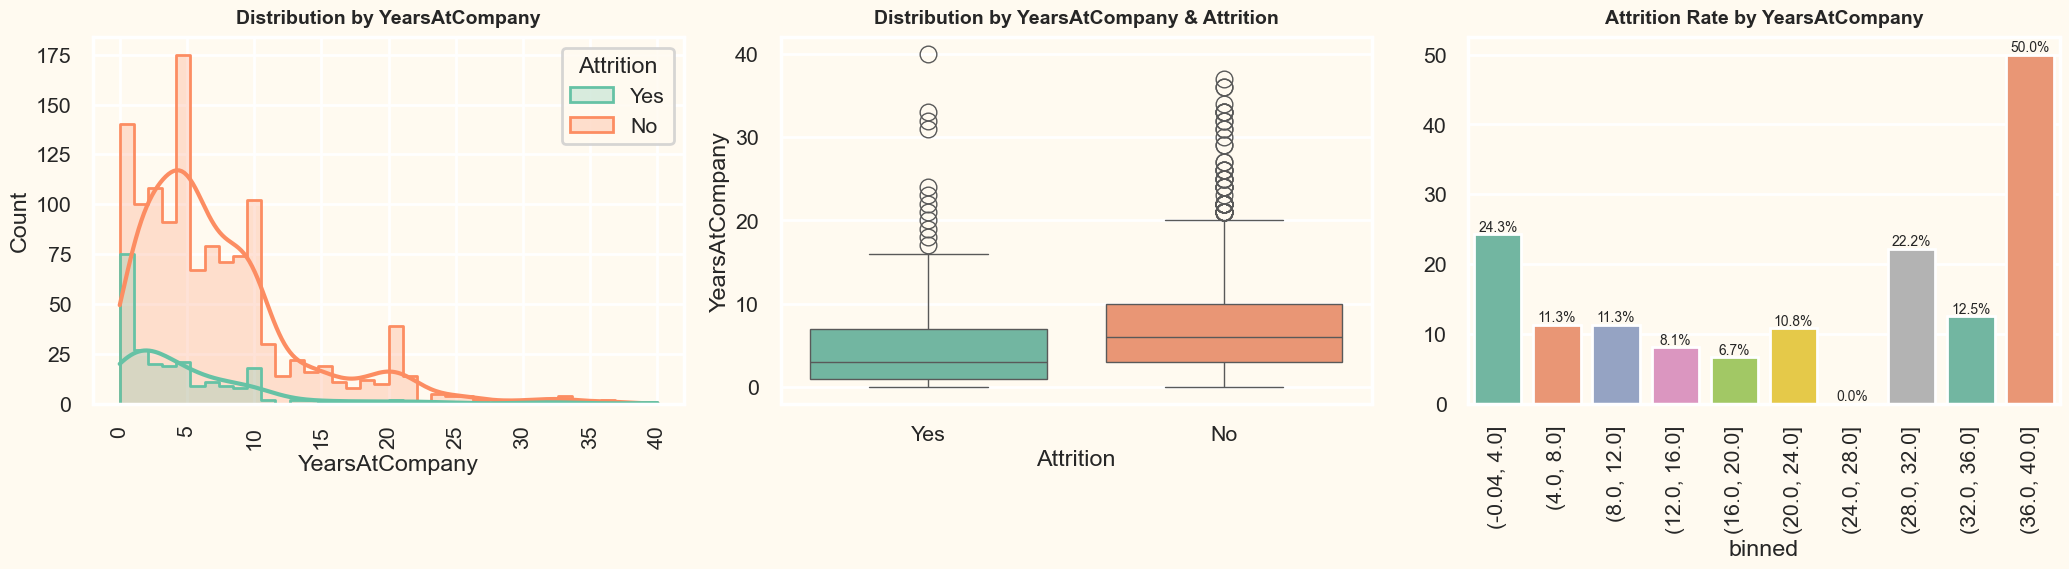

In [36]:
hist_with_hue(df, 'YearsAtCompany', 'Attrition')

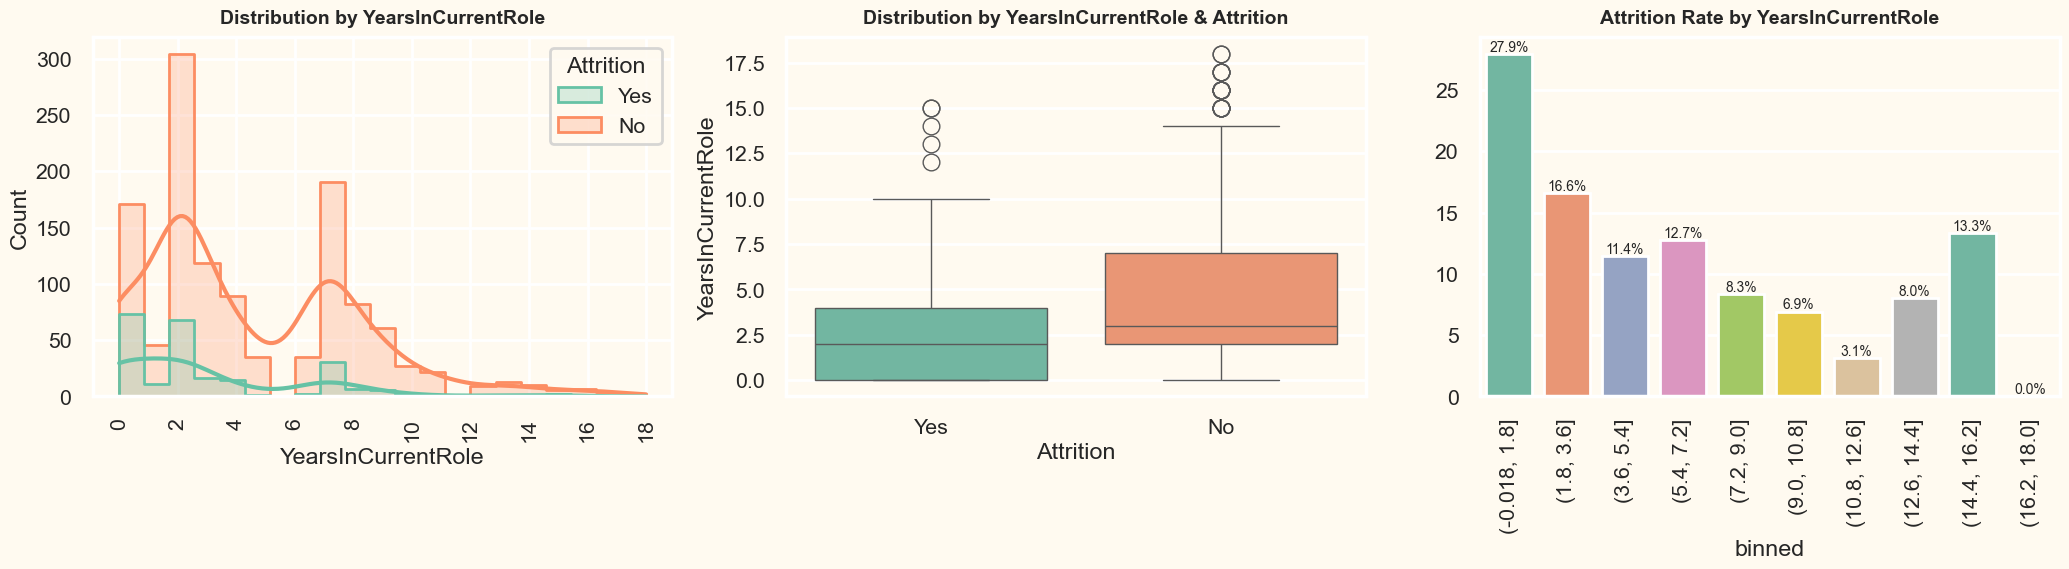

In [37]:
hist_with_hue(df, 'YearsInCurrentRole', 'Attrition')

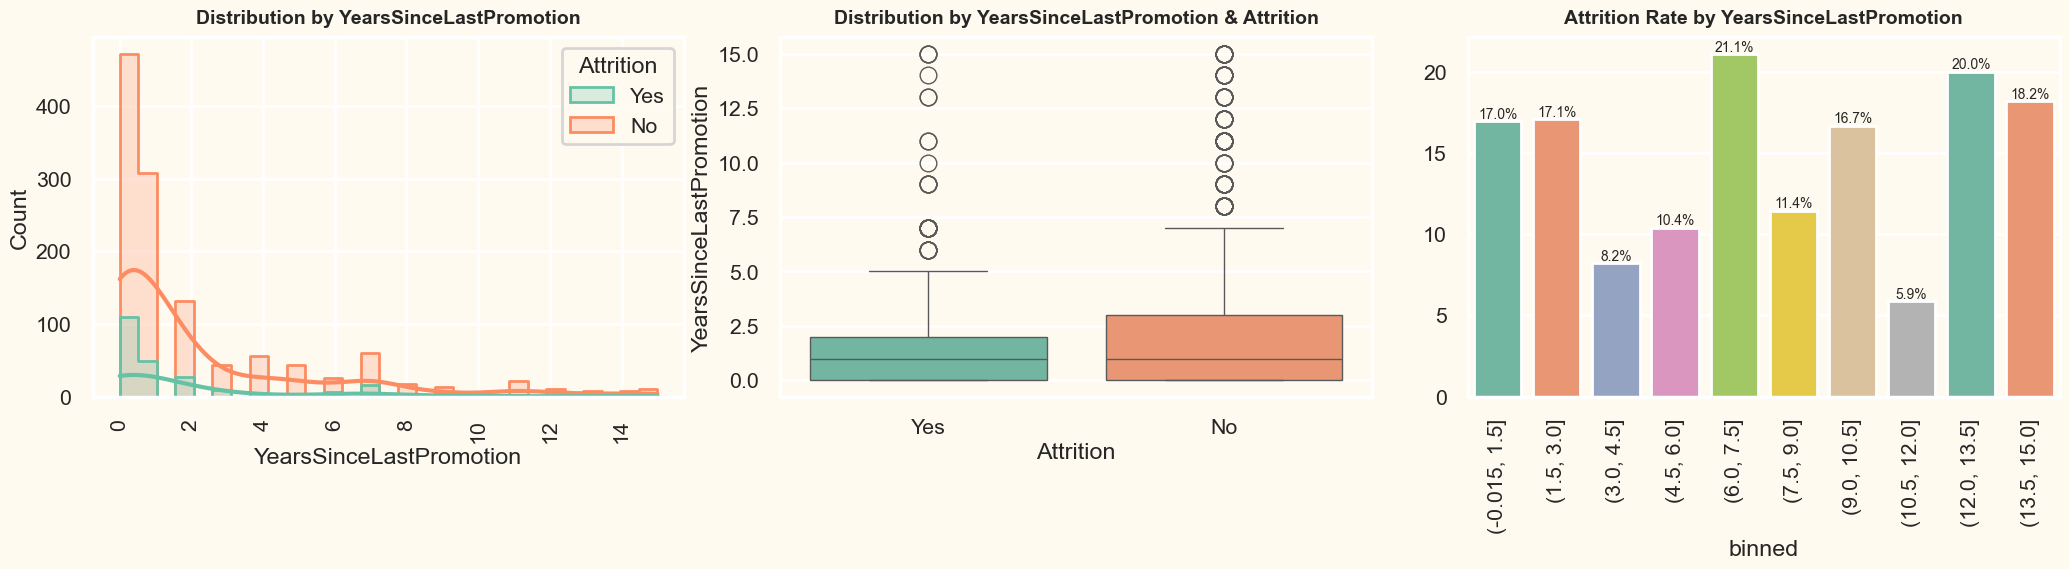

In [38]:
hist_with_hue(df, 'YearsSinceLastPromotion', 'Attrition')

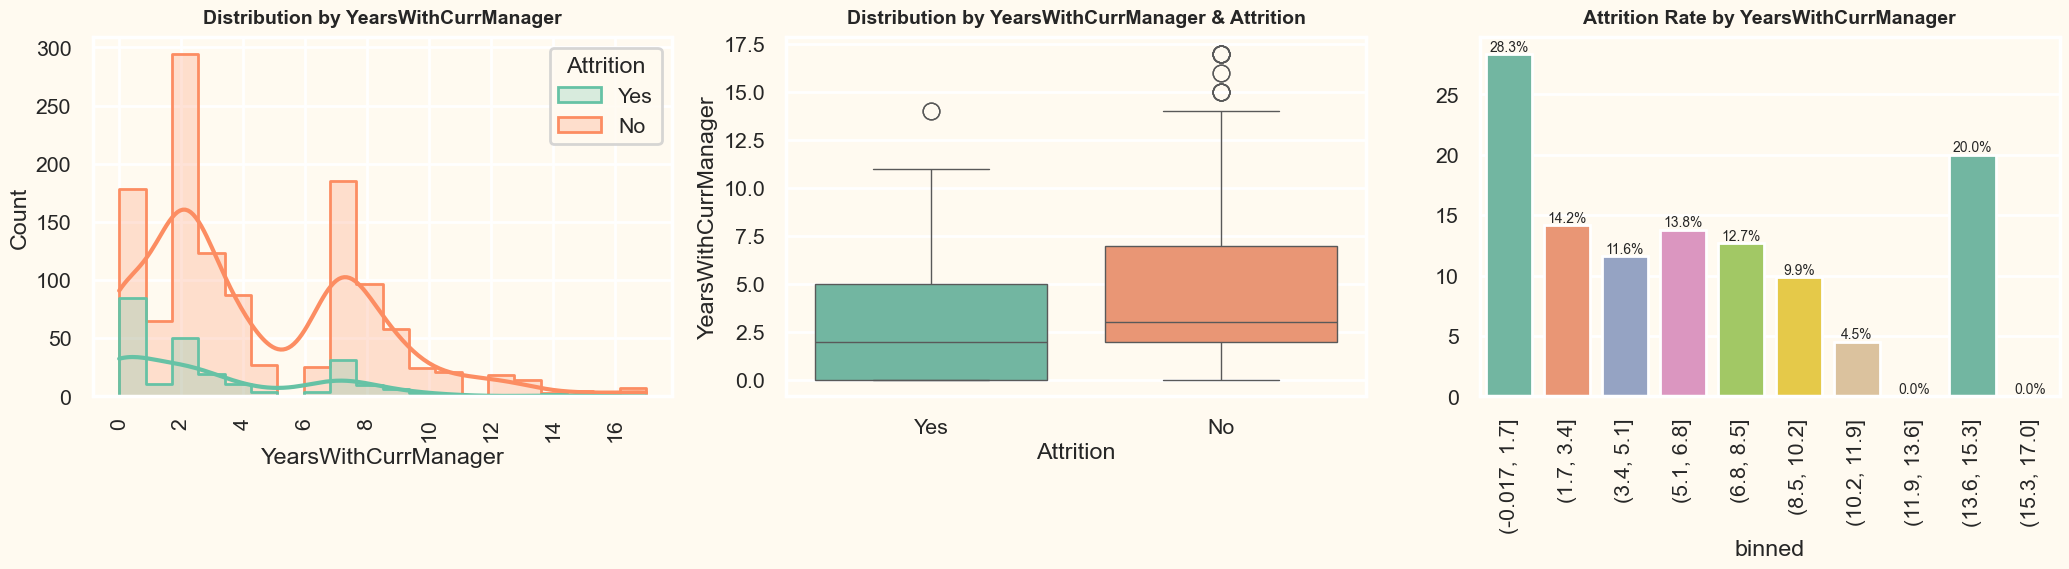

In [39]:
hist_with_hue(df, 'YearsWithCurrManager', 'Attrition')

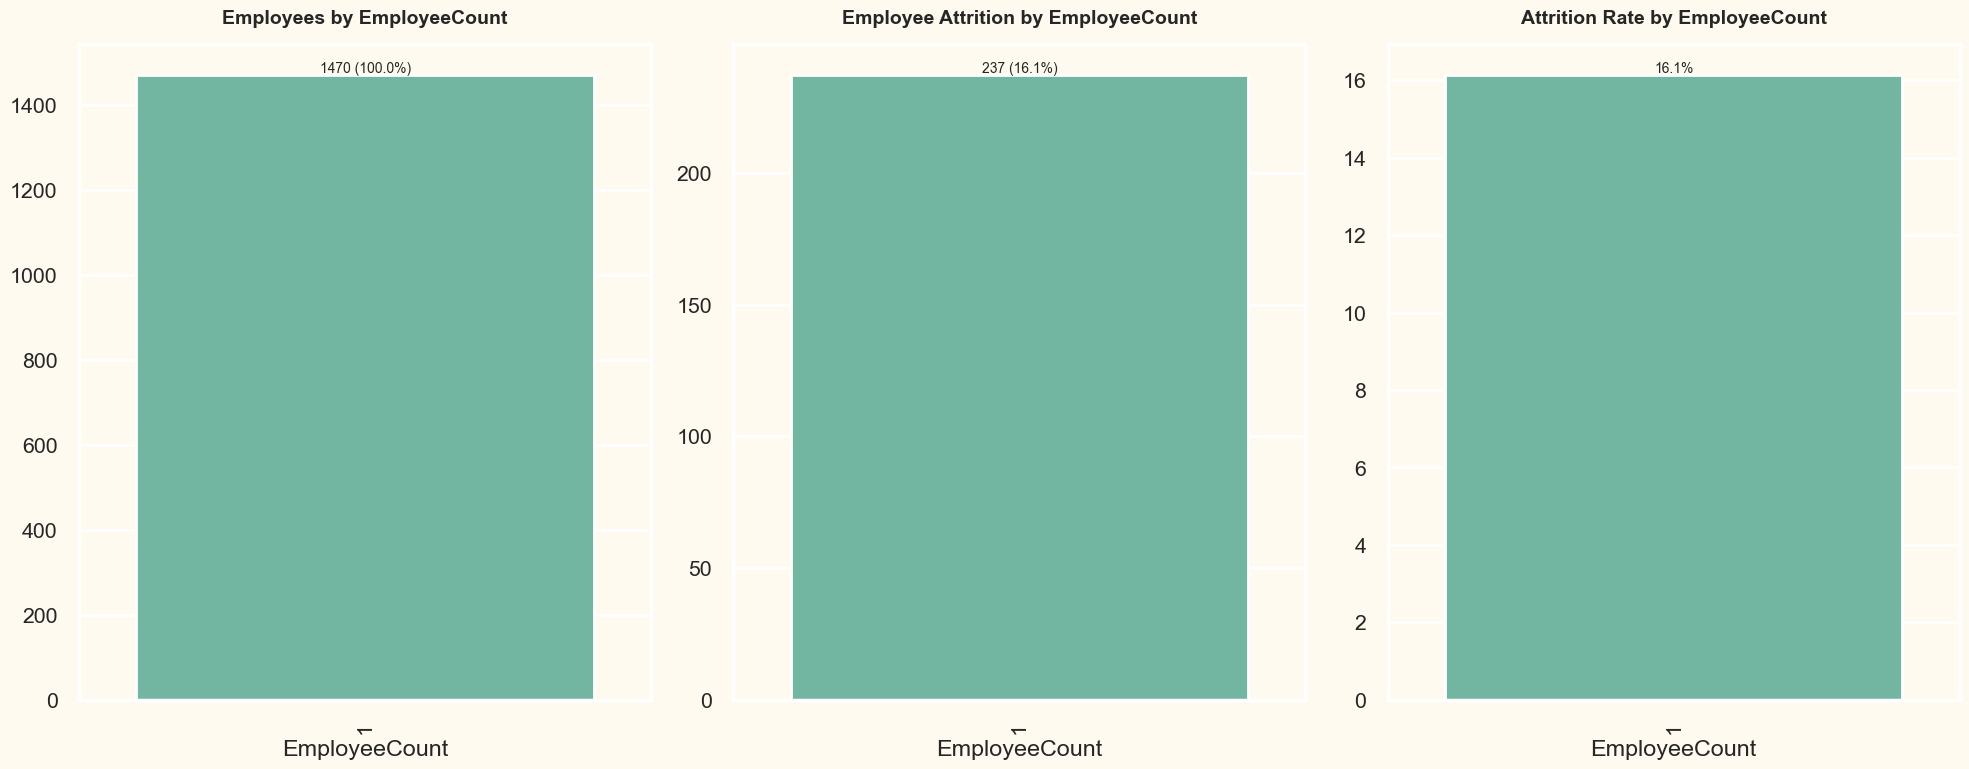

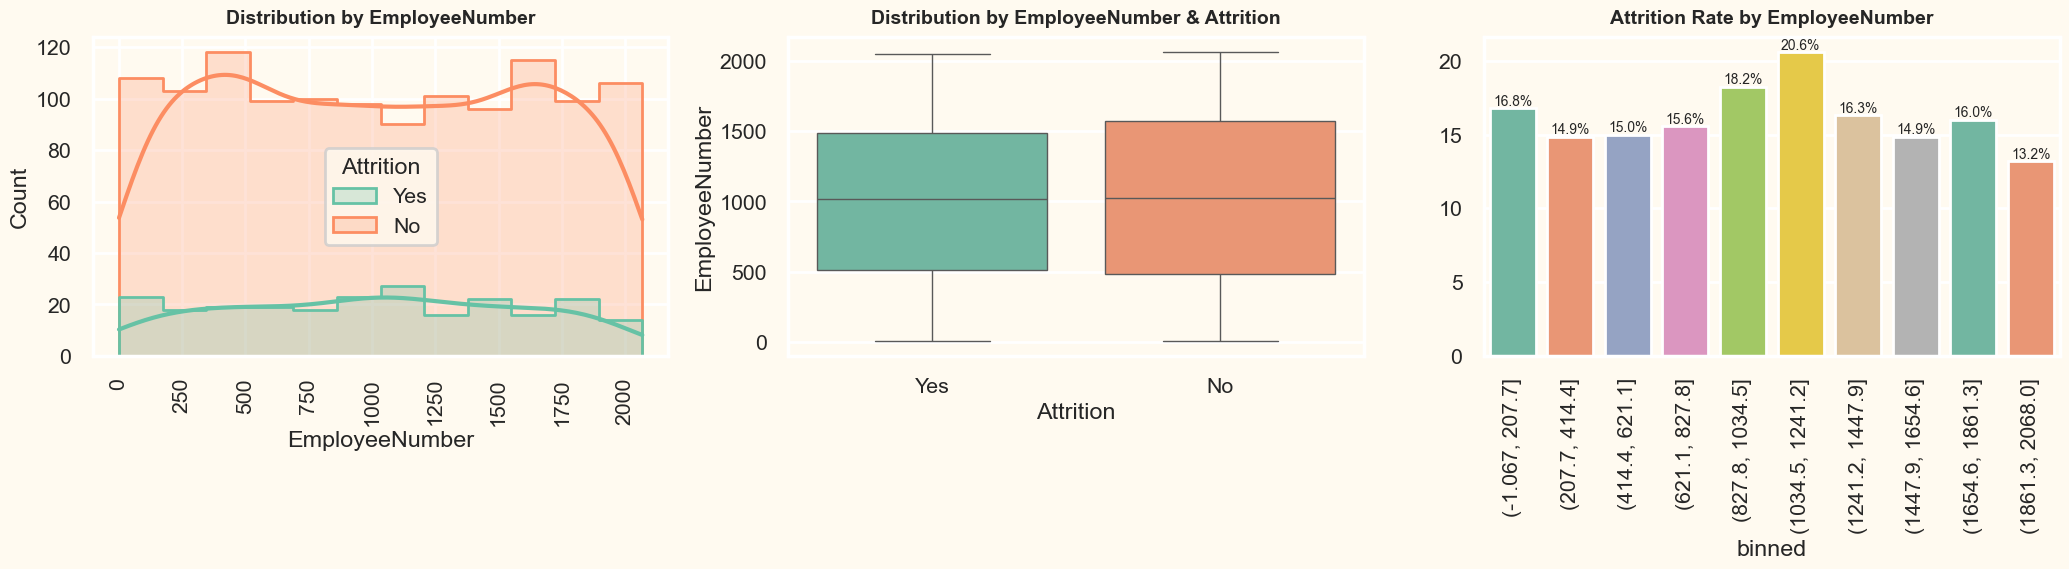

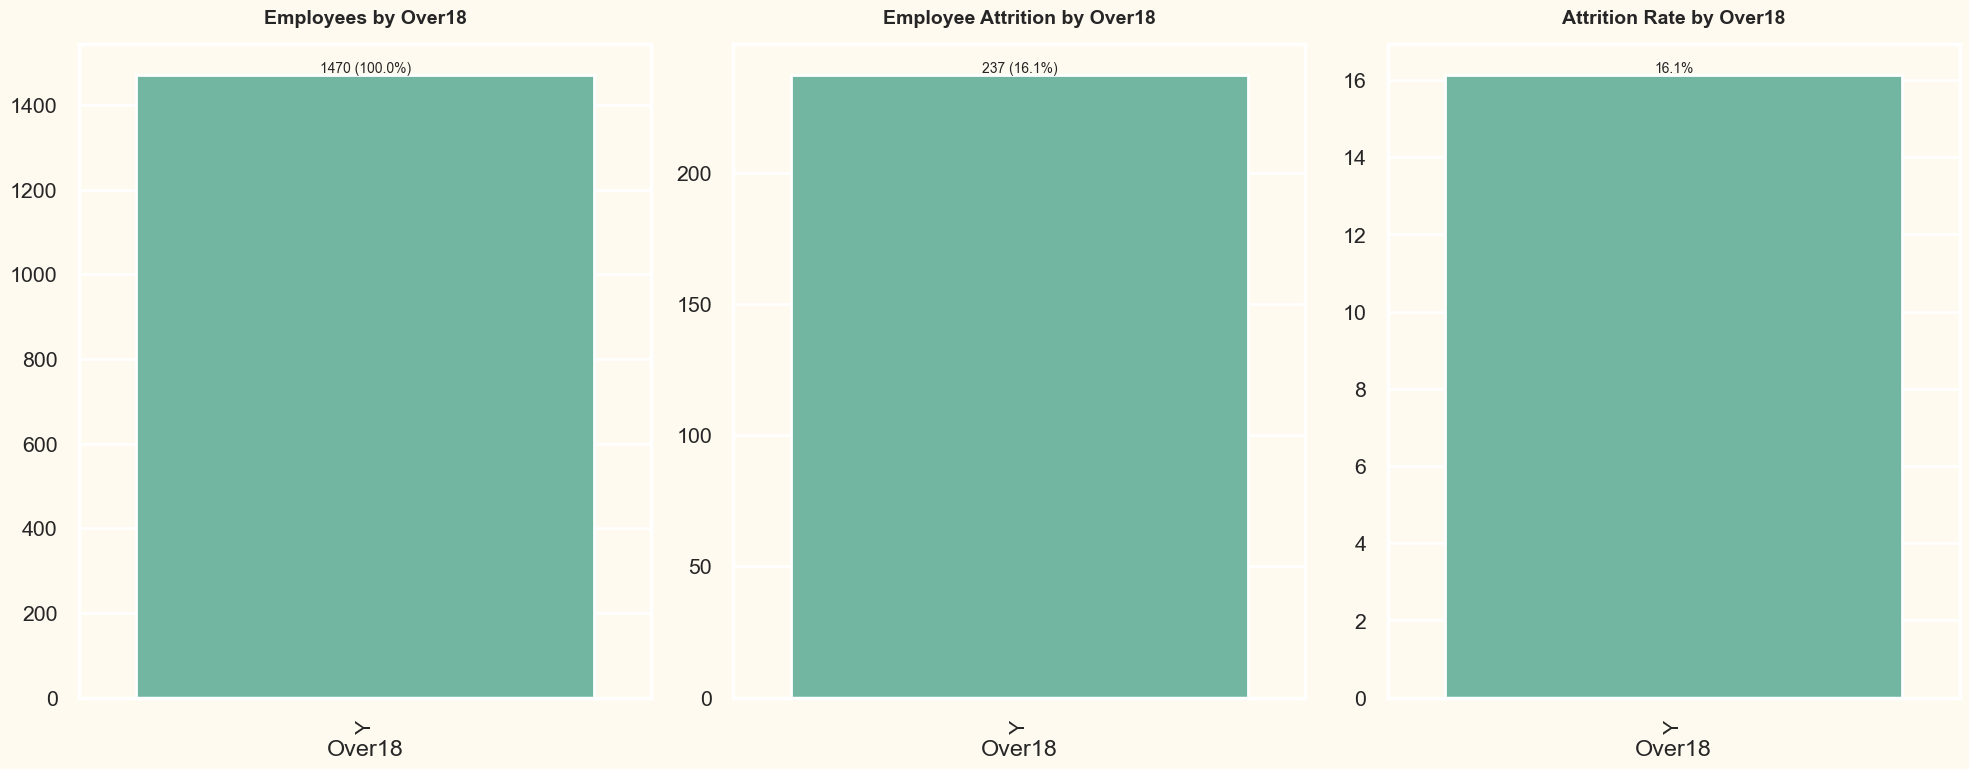

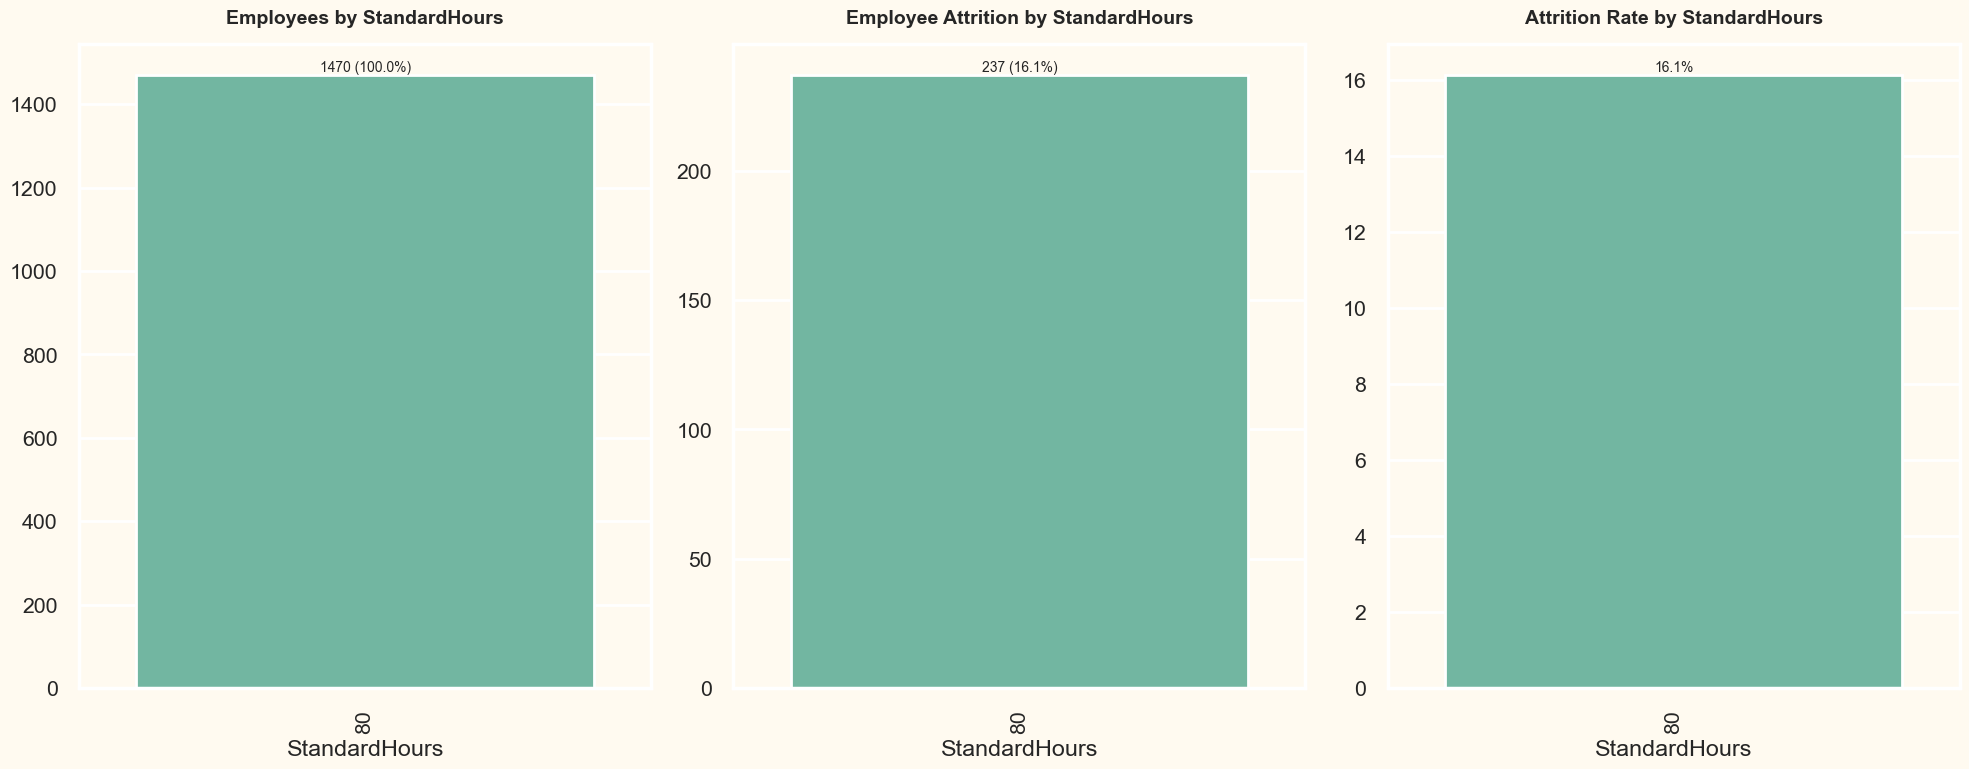

In [40]:
count_percent_plot(df, 'EmployeeCount', 'Attrition')
hist_with_hue(df, 'EmployeeNumber', 'Attrition')
count_percent_plot(df, 'Over18', 'Attrition')
count_percent_plot(df, 'StandardHours', 'Attrition')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


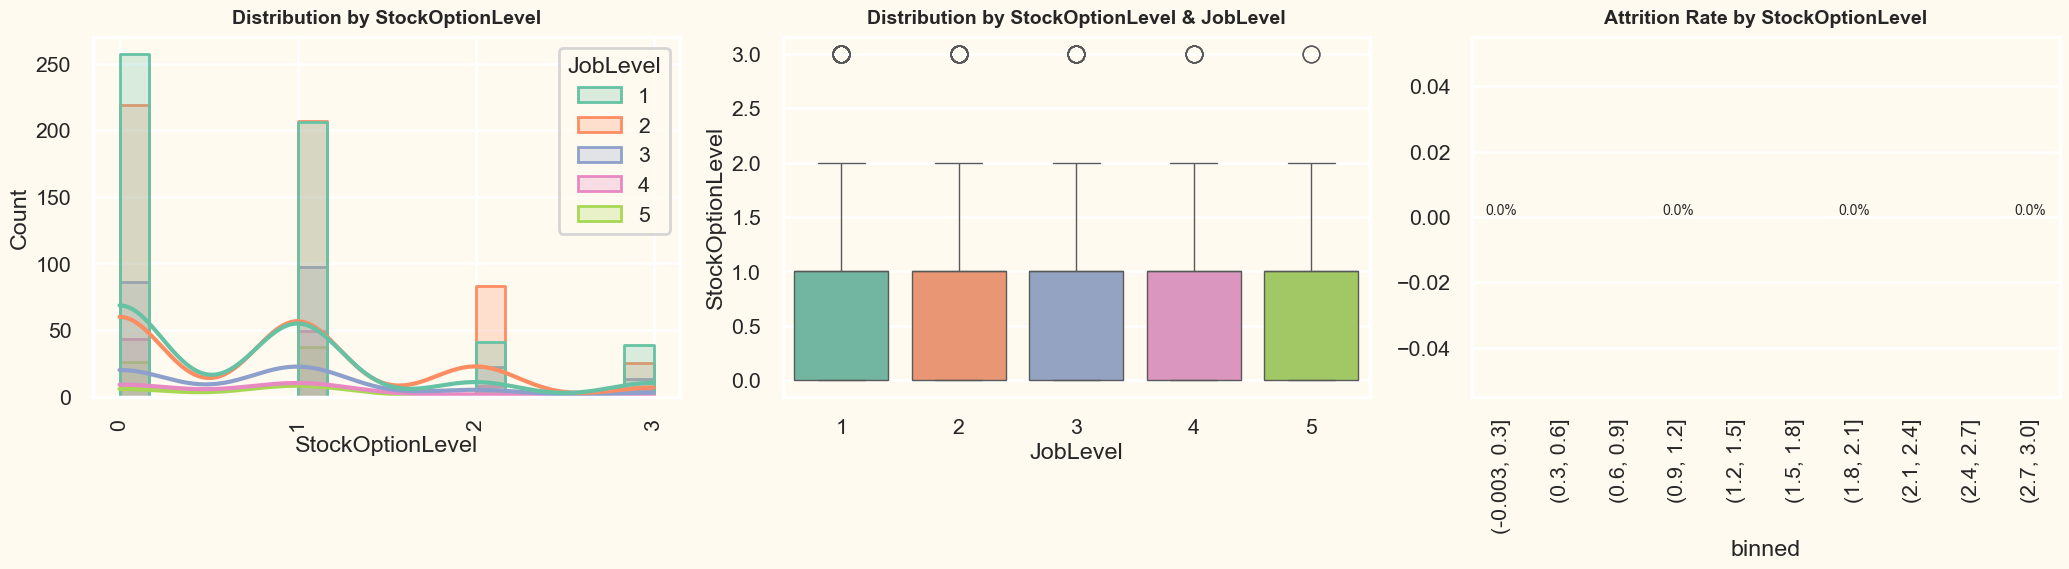

In [42]:
hist_with_hue(df, 'StockOptionLevel', 'JobLevel')